# Exploring Minority-related data in the AP and Carnegie Datasets

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(context='paper',style='white', font='sans-serif', font_scale=3, color_codes=True, rc={'figure.figsize':(10.0,10.0)})

In [74]:
carnegie=pd.read_excel('data/CCIHE2021-PublicData.xlsx',sheet_name='Data') # Carnegie university clasification as dataframe
# 2021-22 school year all AP data
outcomes_2022=pd.read_excel('data/AP_data_fixed-outcome.xlsx',sheet_name='2022')
participation_2022=pd.read_excel('data/AP_data_fixed-participation.xlsx',sheet_name='2022',header=None).T
availability_2022=pd.read_excel('data/AP_data_fixed-availability.xlsx',sheet_name='2022',header=None).T
states_abbrv=pd.read_csv('data/State Abbreviation.csv')

In [75]:
participation_2022.columns=participation_2022.iloc[0]
availability_2022.columns=availability_2022.iloc[0]
participation_2022=participation_2022[1:]
availability_2022=availability_2022[1:]

In [82]:
outcomes_2022=pd.merge(outcomes_2022,states_abbrv,on='State')
participation_2022=pd.merge(participation_2022,states_abbrv,on='State')
availability_2022=pd.merge(availability_2022,states_abbrv,on='State')

Minority data:

HBCU, HSI, MSI (HBCU, HSI, TRIBAL), TRIBAL, WOMENS

In [146]:
carnegie_states_summed=[]
for state in states_abbrv['stabbr']:
    carnegie_states_summed.append([state,
    carnegie['msi'].loc[carnegie['stabbr']==state].sum(),
    carnegie['hbcu'].loc[carnegie['stabbr']==state].sum(),
    carnegie['hsi'].loc[carnegie['stabbr']==state].sum(),
    carnegie['tribal'].loc[carnegie['stabbr']==state].sum(),
    carnegie['womens'].loc[carnegie['stabbr']==state].sum()])
carnegie_states_summed=pd.DataFrame(carnegie_states_summed,columns=['stabbr','msi','hbcu','hsi','tribal','womens'])


In [139]:
minorities_ap=['Overall', 'Asian', 'Hispanic/Latino', 'White',
       'Black or African American', 'Native American or Alaska Native',
       'Native Hawaiian or other Pacific Islander', 'Two or More Races',
       'No Response']

# combined_carnegie_ap=pd.Dataframe()
keys_participation=[]
keys_availability=[]


for race in minorities_ap:
       for key in participation_2022:
              if race=='Two or More Races' and 'races' in key:
                     keys_participation.append(key)
              elif race in key:
                     keys_participation.append(key)
       for key in availability_2022:
              if race=='Two or More Races' and 'races' in key:
                     keys_availability.append(key)
              elif race in key:
                     keys_availability.append(key)

       # for state in states_abbrv['stabbr']:

       #        combined_carnegie_ap.update({'stabbr':state,
       #        'msi':carnegie['msi'].loc[carnegie['stabbr']==state].sum(),
       #        'hbcu':carnegie['hbcu'].loc[carnegie['stabbr']==state].sum(),
       #        'hsi':carnegie['hsi'].loc[carnegie['stabbr']==state].sum(),
       #        'tribal':carnegie['tribal'].loc[carnegie['stabbr']==state].sum(),
       #        'womens':carnegie['womens'].loc[carnegie['stabbr']==state].sum(),
       #        'outcomes':outcomes_2022.loc[outcomes_2022['Race']==race].loc[outcomes_2022['stabbr']==state]})

              

In [143]:
outcomes_2022.loc[outcomes_2022['Race']=='Asian'].loc[outcomes_2022['stabbr']==state]

,State,Race,Score 5,Score 4,Score 3,Score 2,Score 1,Total,Mean,stabbr
460,Wyoming,Asian,25,23,22,13,12,95,3.4,WY


In [140]:
full_ap_keys=minorities_ap+keys_availability+keys_participation

In [244]:
outcomes_ap_carnegie=pd.merge(outcomes_2022,carnegie_states_summed,on='stabbr')
outcomes_ap_carnegie=outcomes_ap_carnegie.replace('**',np.nan)


C:\Users\shann\AppData\Local\Temp\ipykernel_10264\2538883759.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outcomes_ap_carnegie=outcomes_ap_carnegie.replace('**',np.nan)


In [253]:
int(outcomes_ap_carnegie['Mean'].min())

1

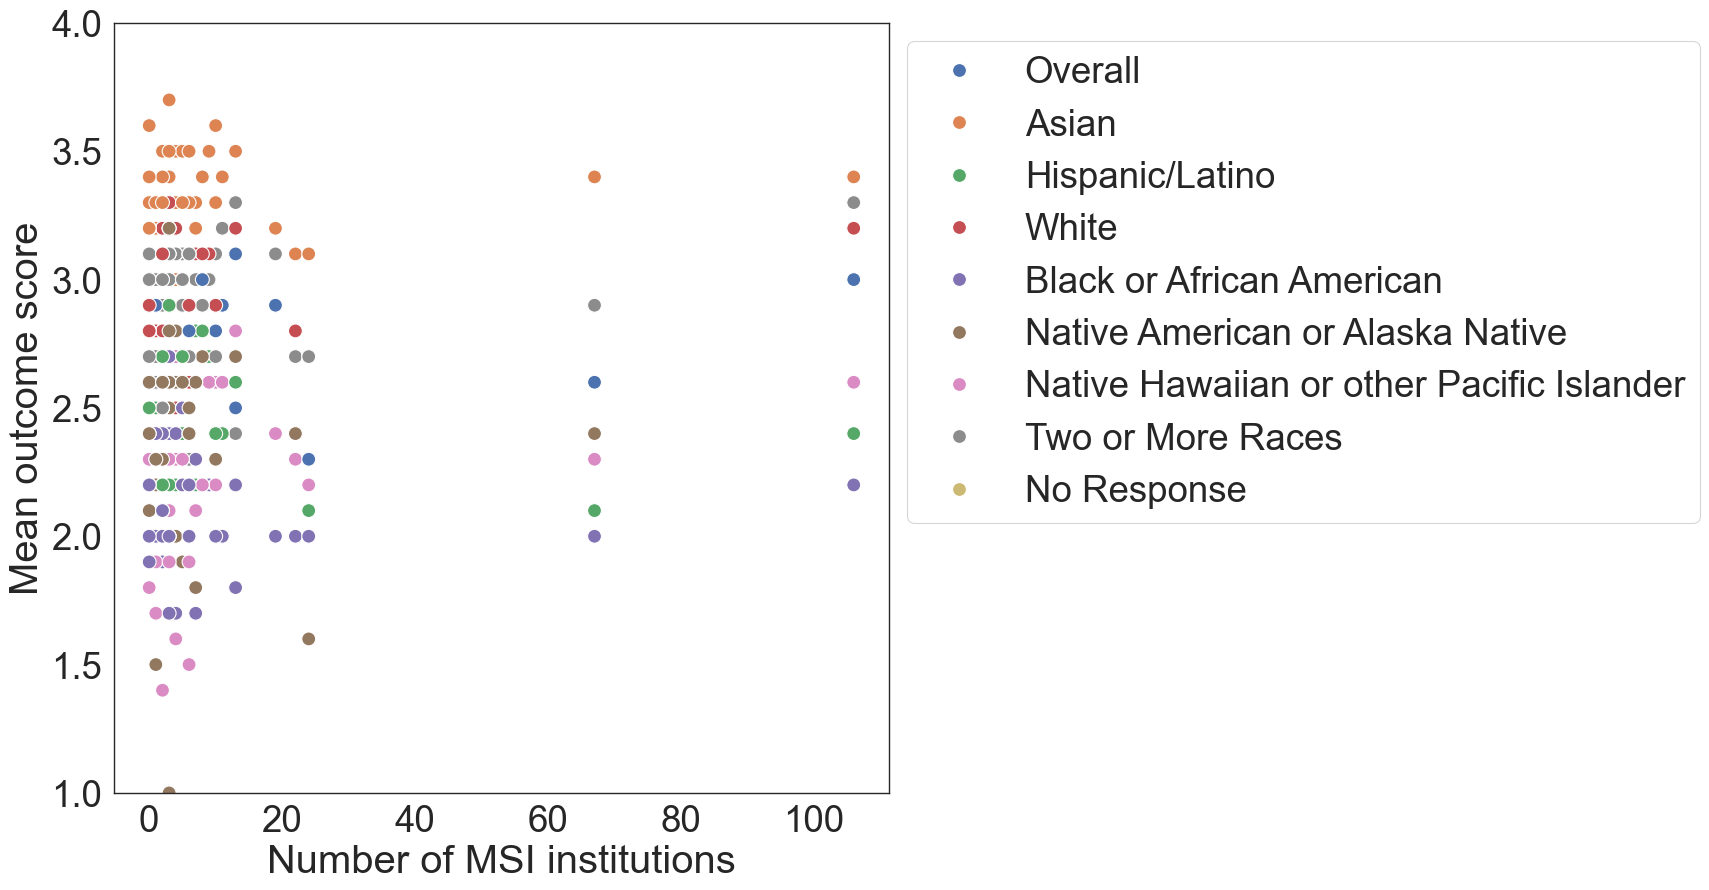

In [254]:
sns.scatterplot(data=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['State']!='National'],x='msi',y='Mean',hue='Race',s=100)
plt.ylim(int(outcomes_ap_carnegie['Mean'].min()),round(outcomes_ap_carnegie['Mean'].max()))
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Number of MSI institutions')
plt.ylabel('Mean outcome score')
plt.show()

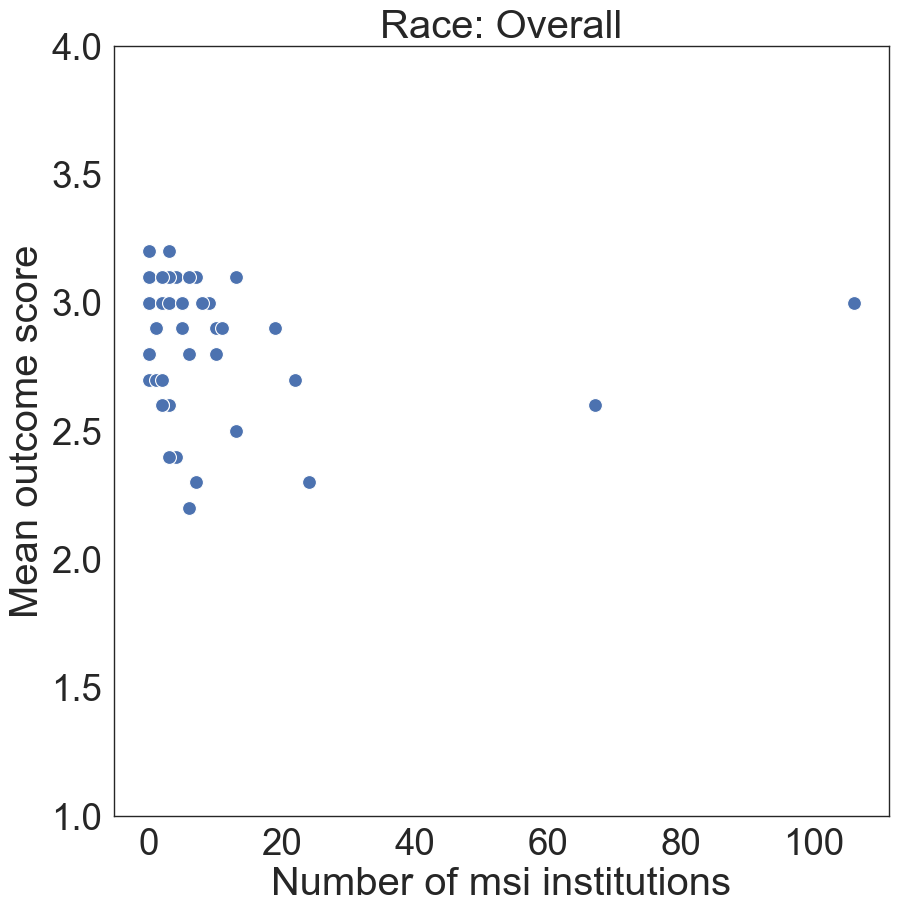

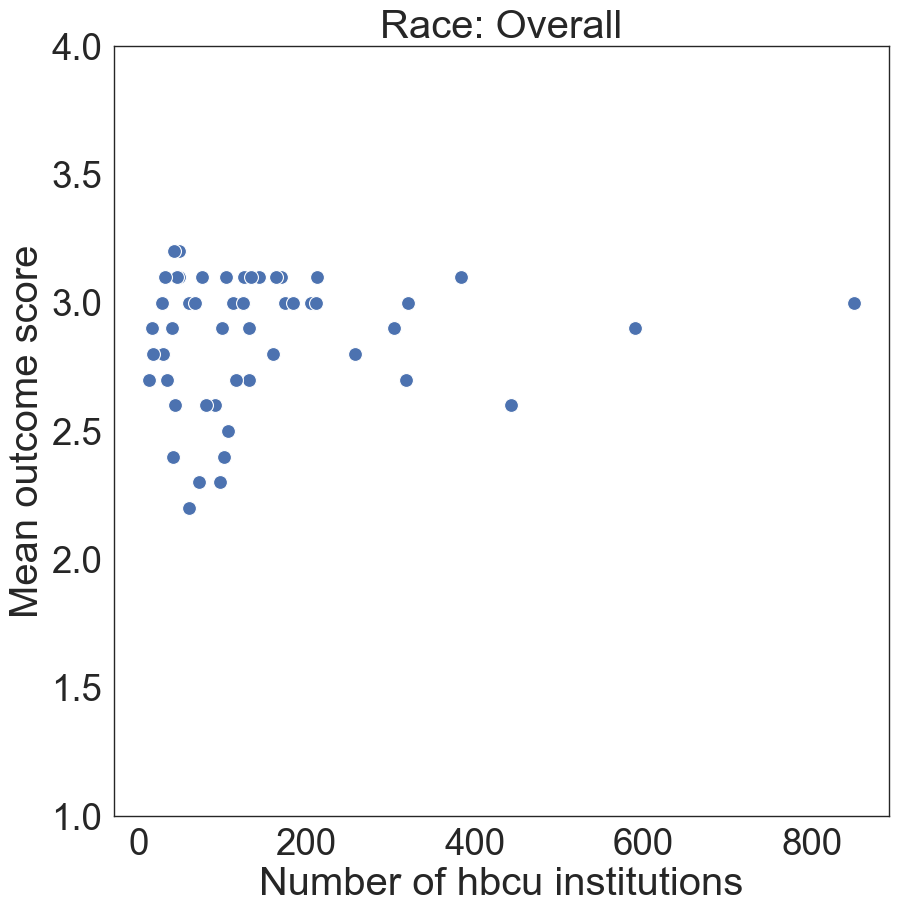

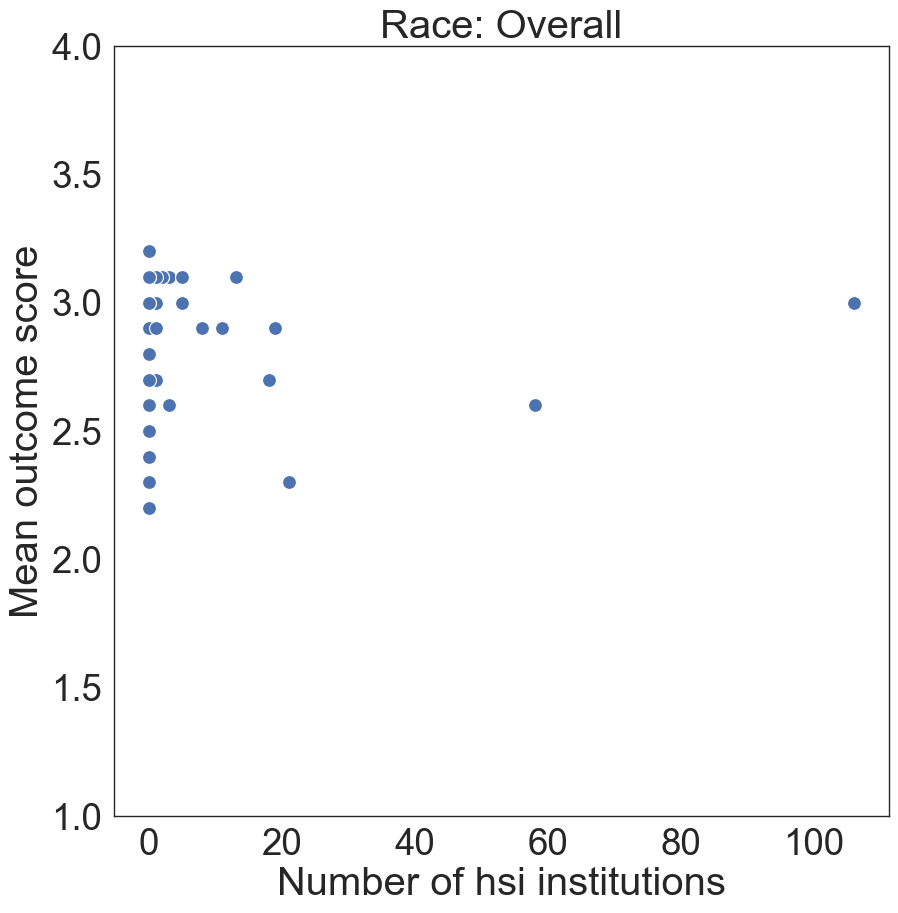

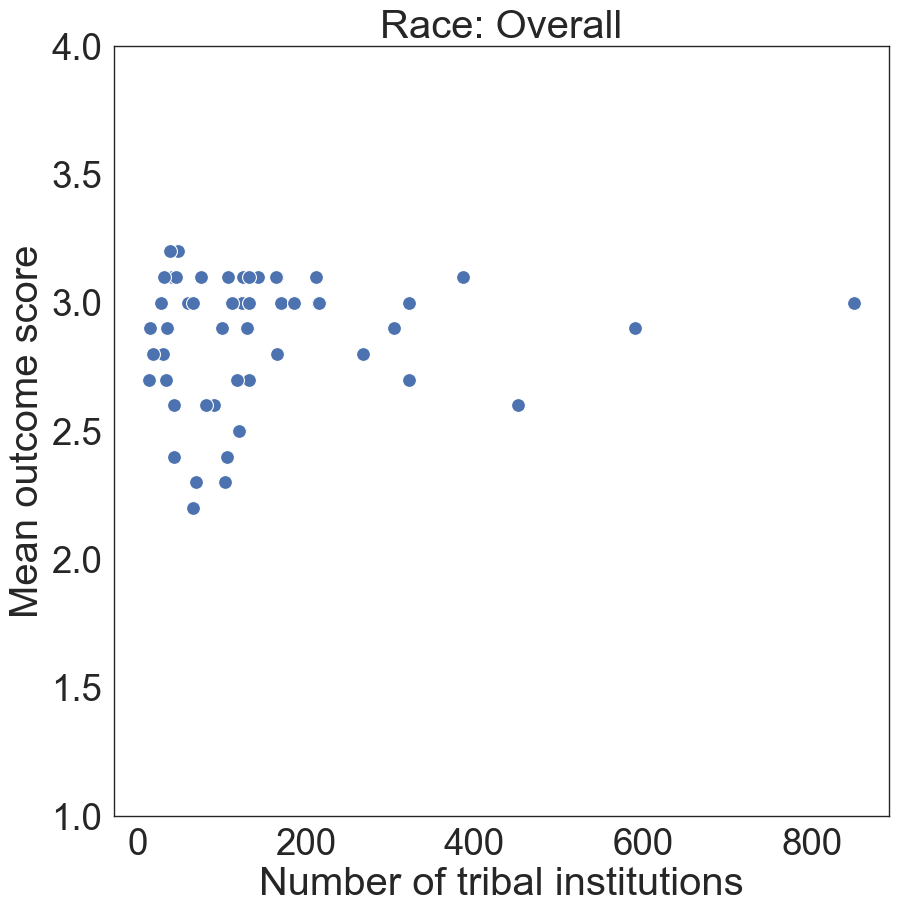

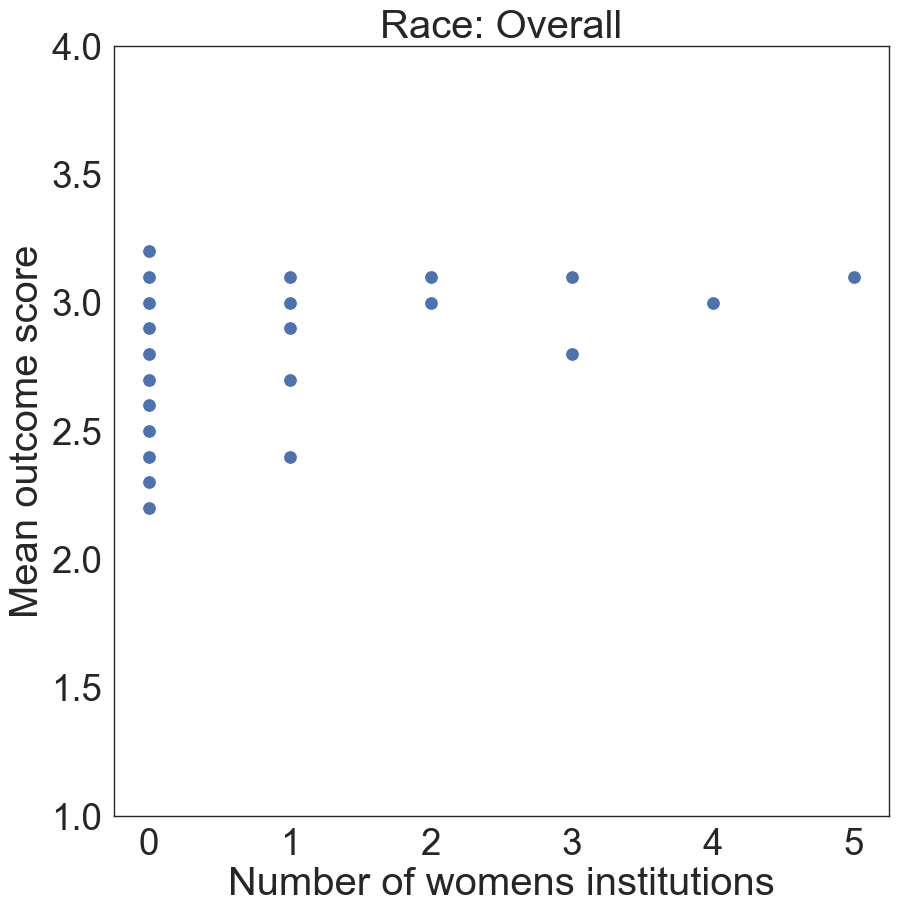

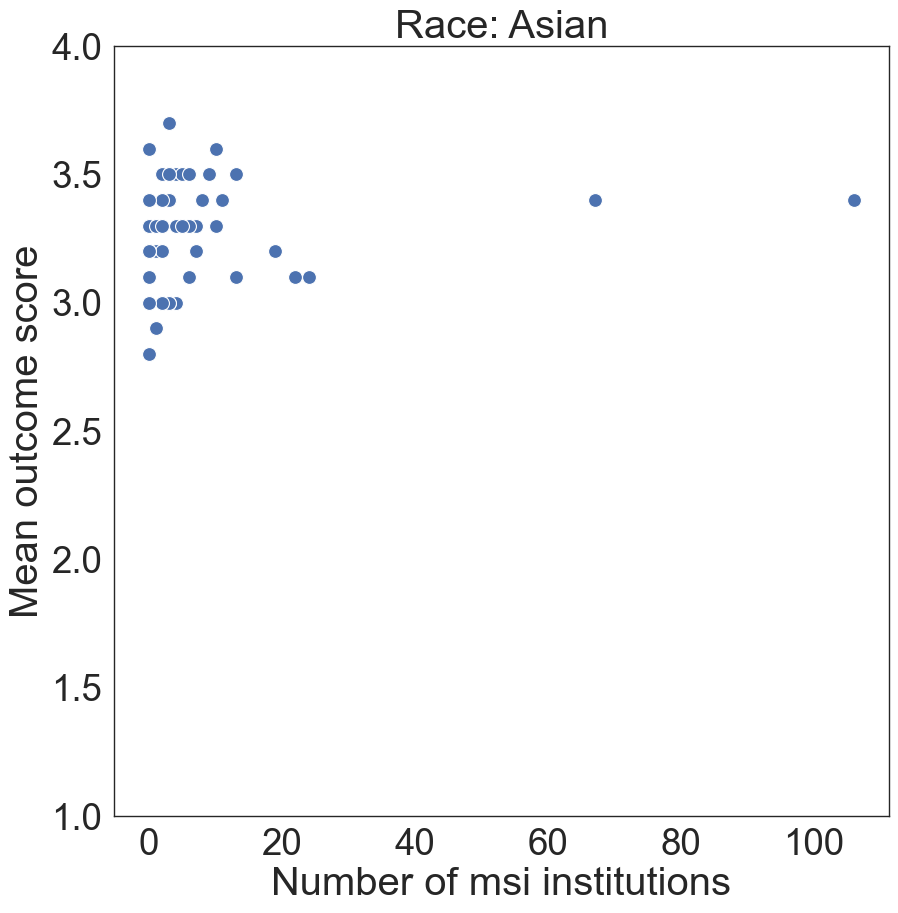

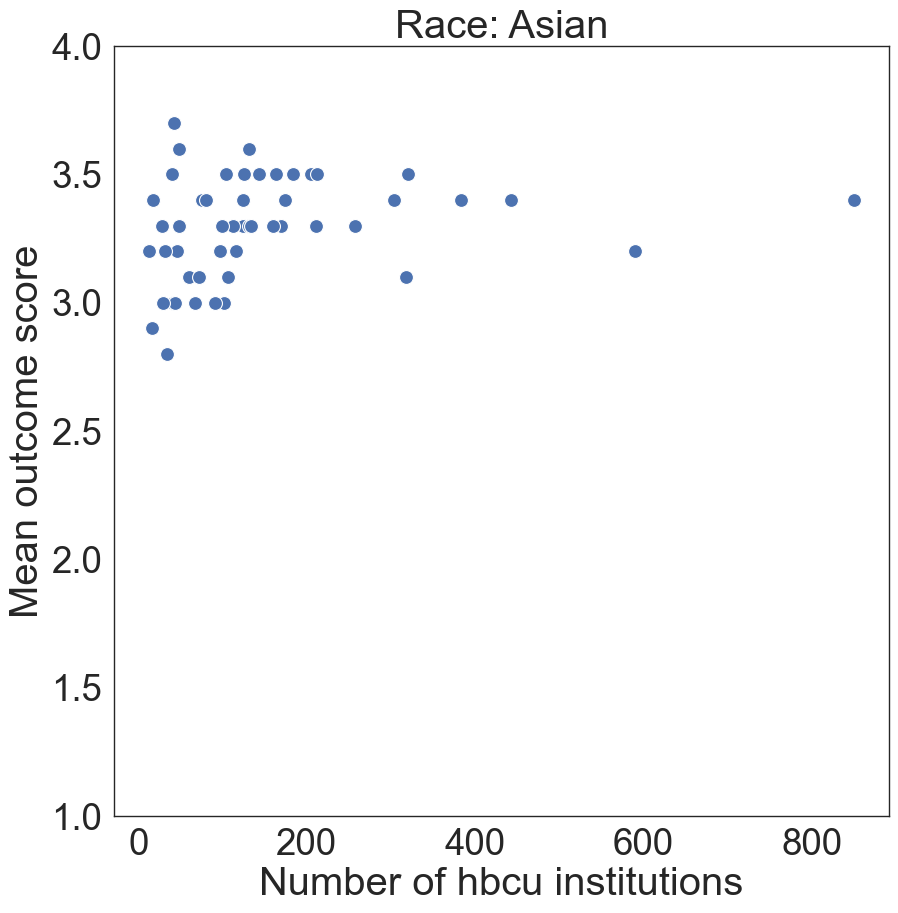

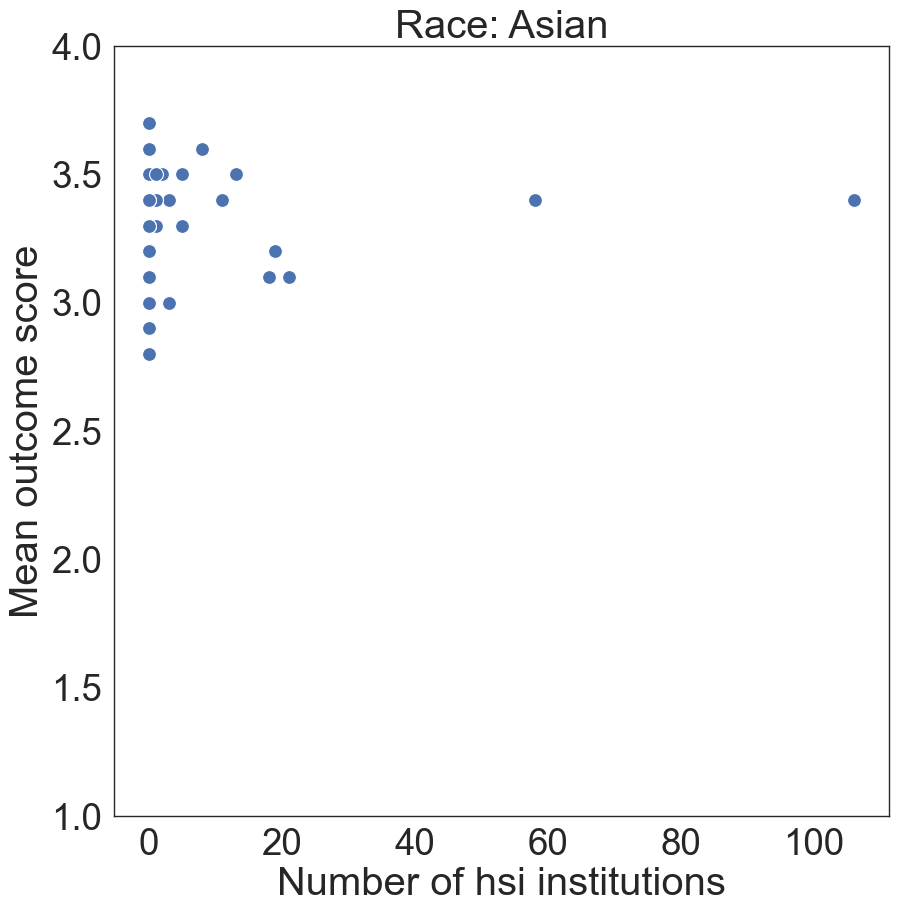

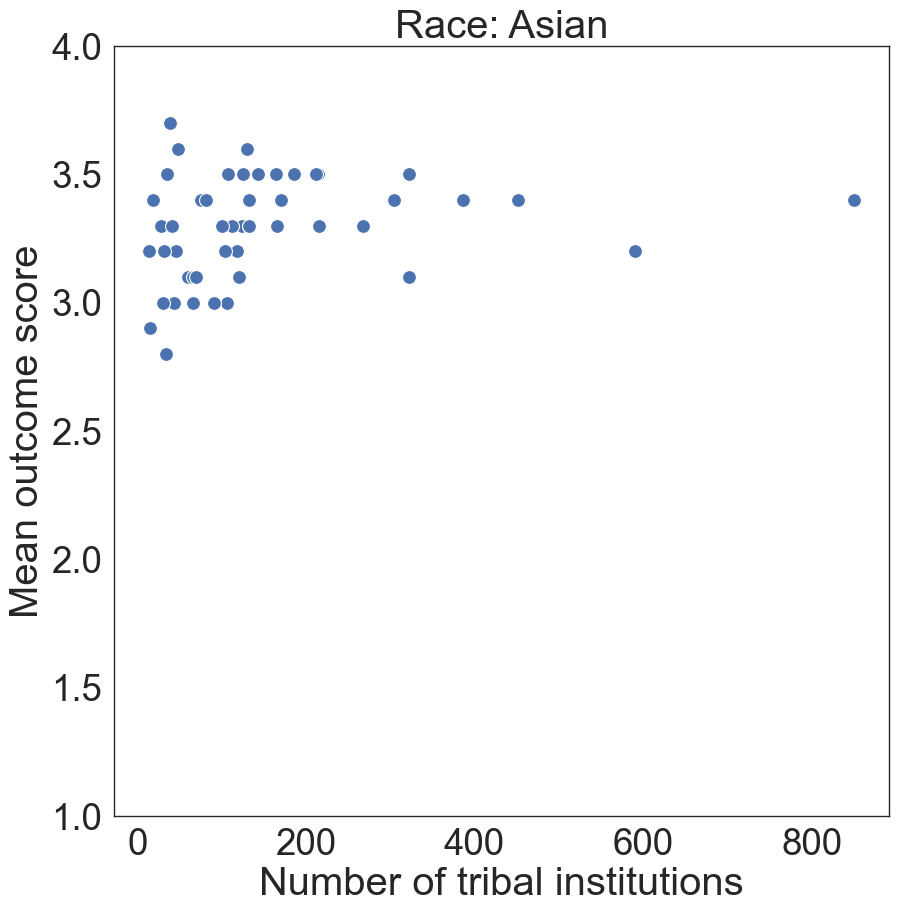

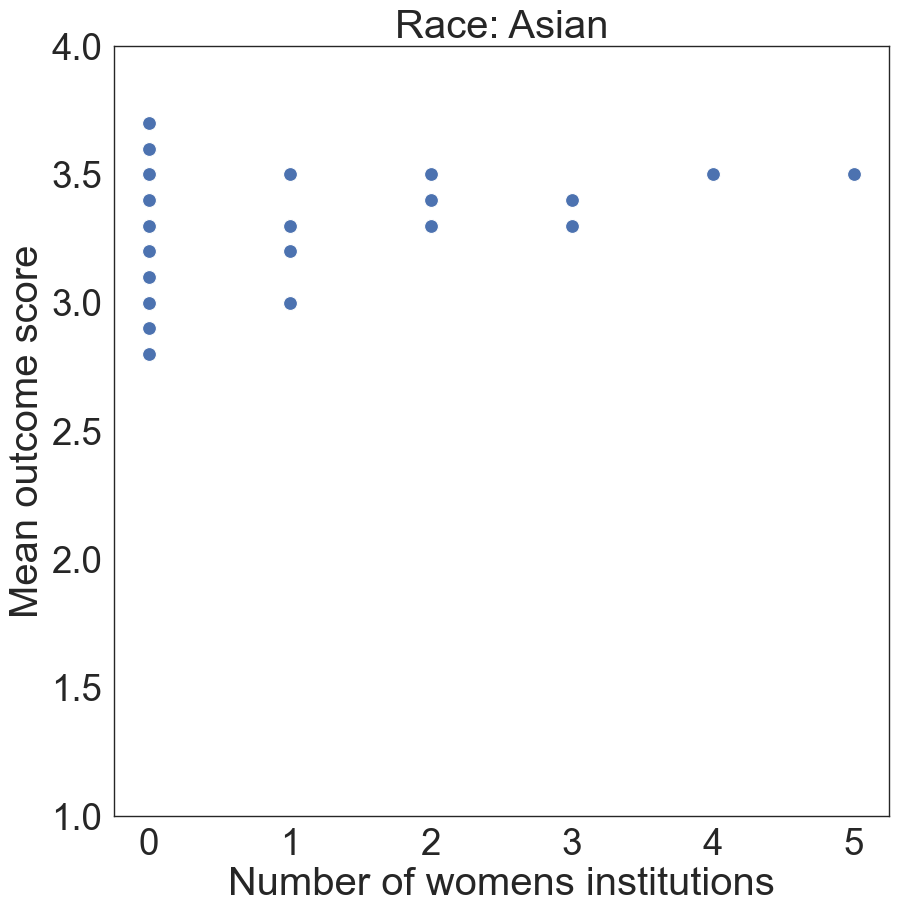

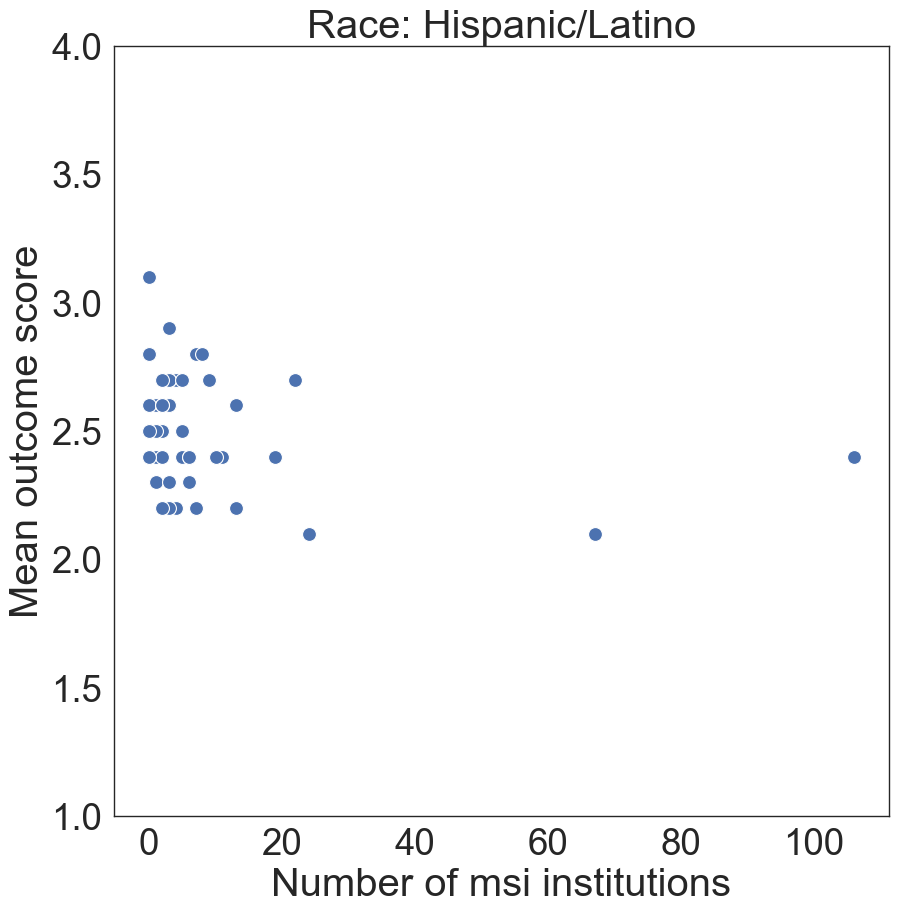

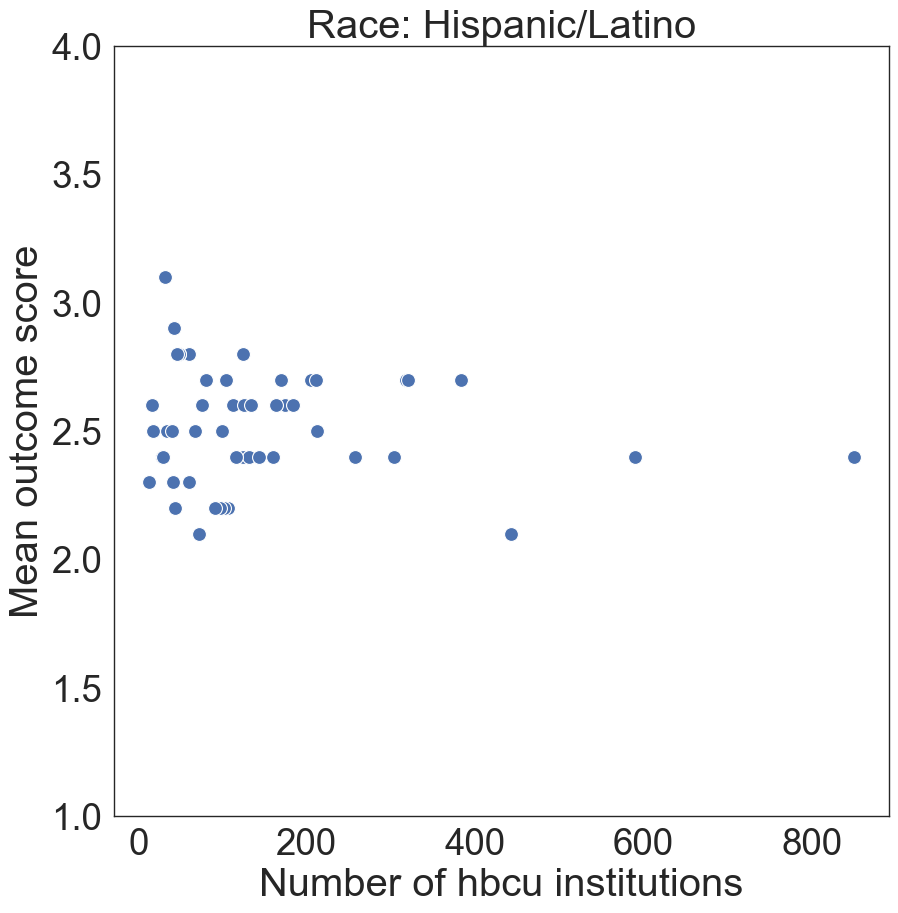

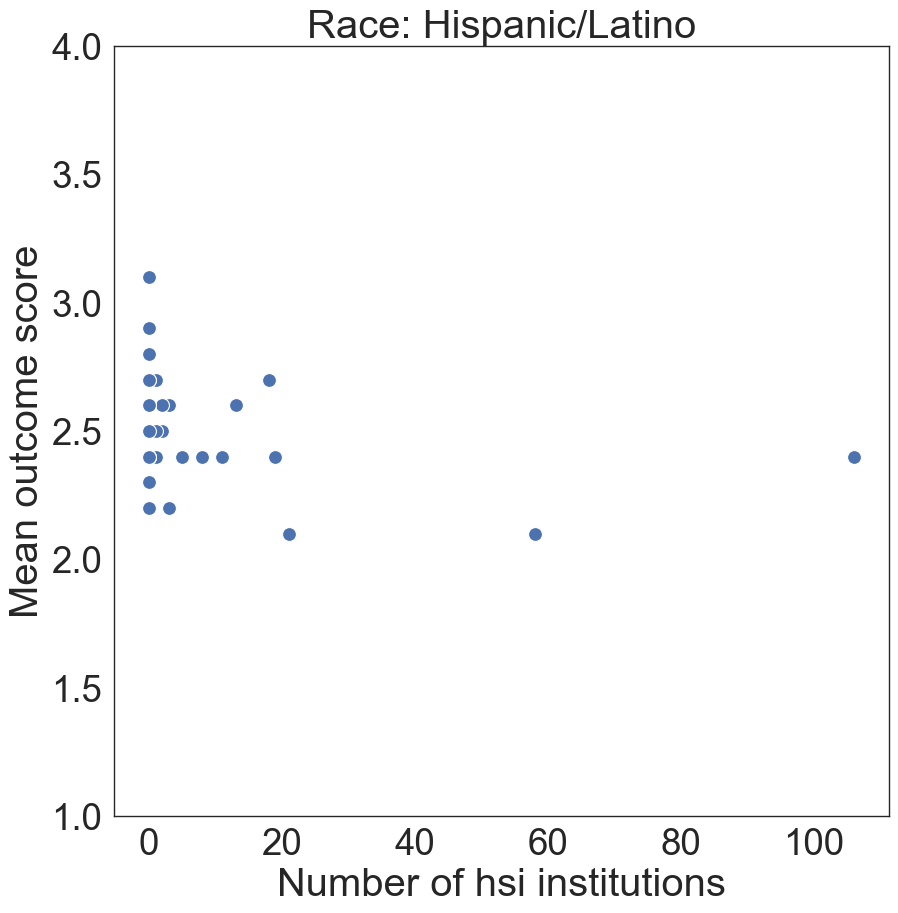

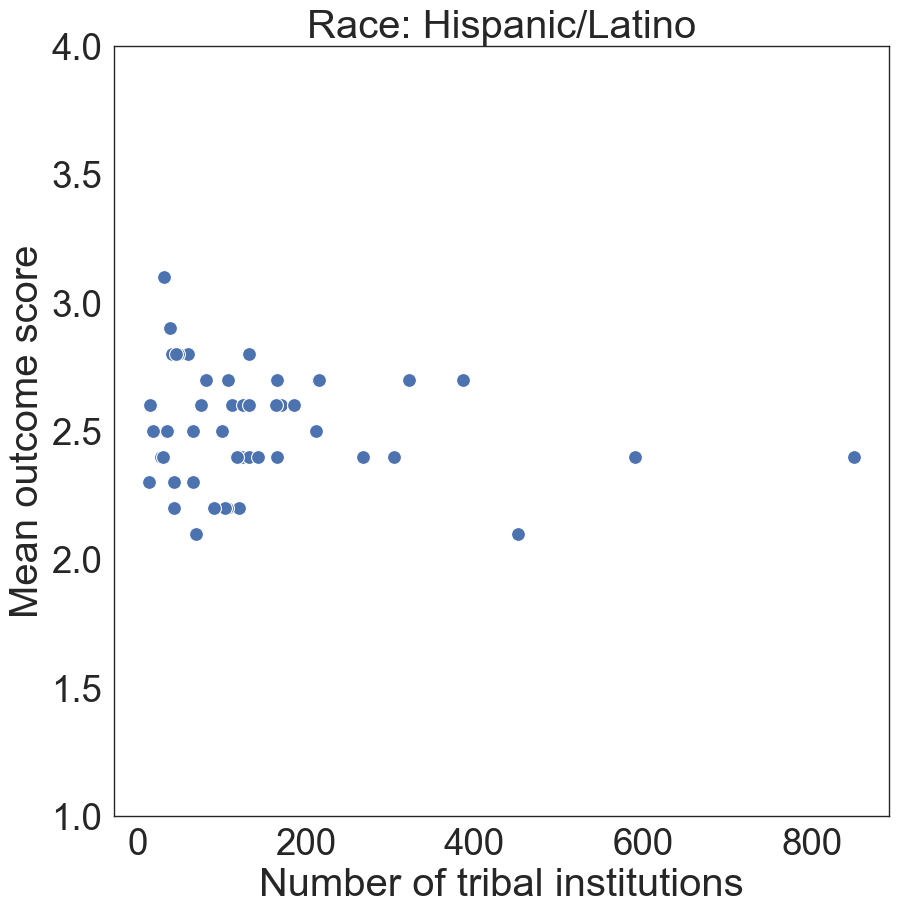

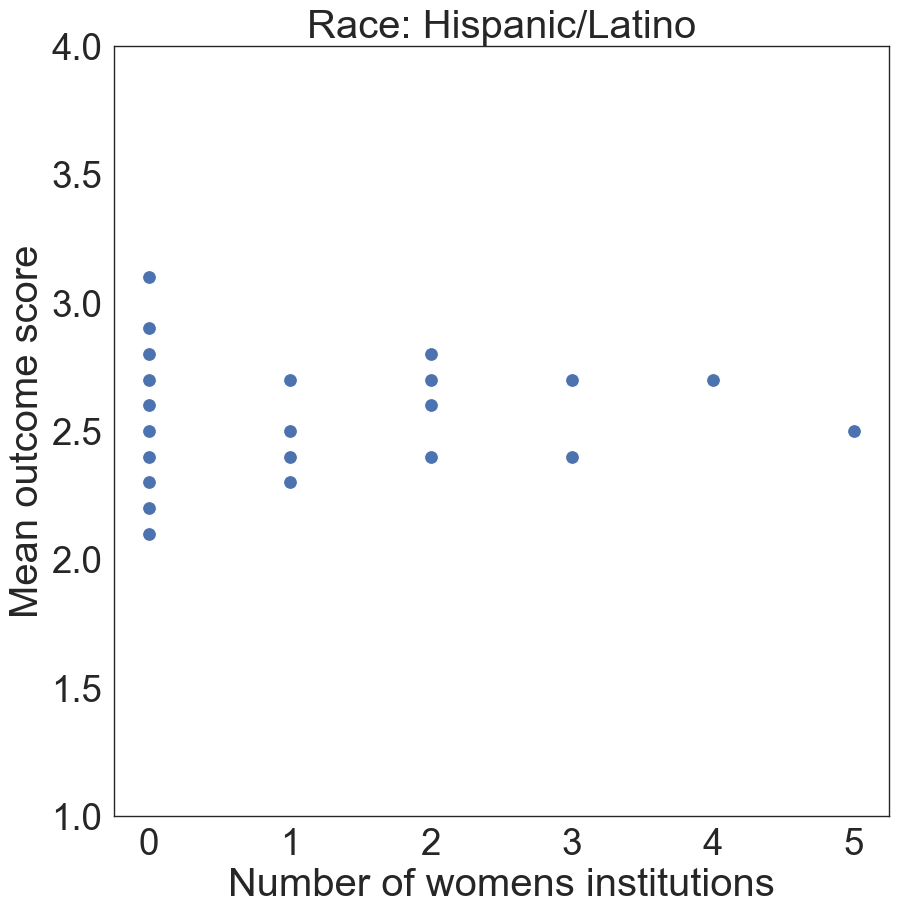

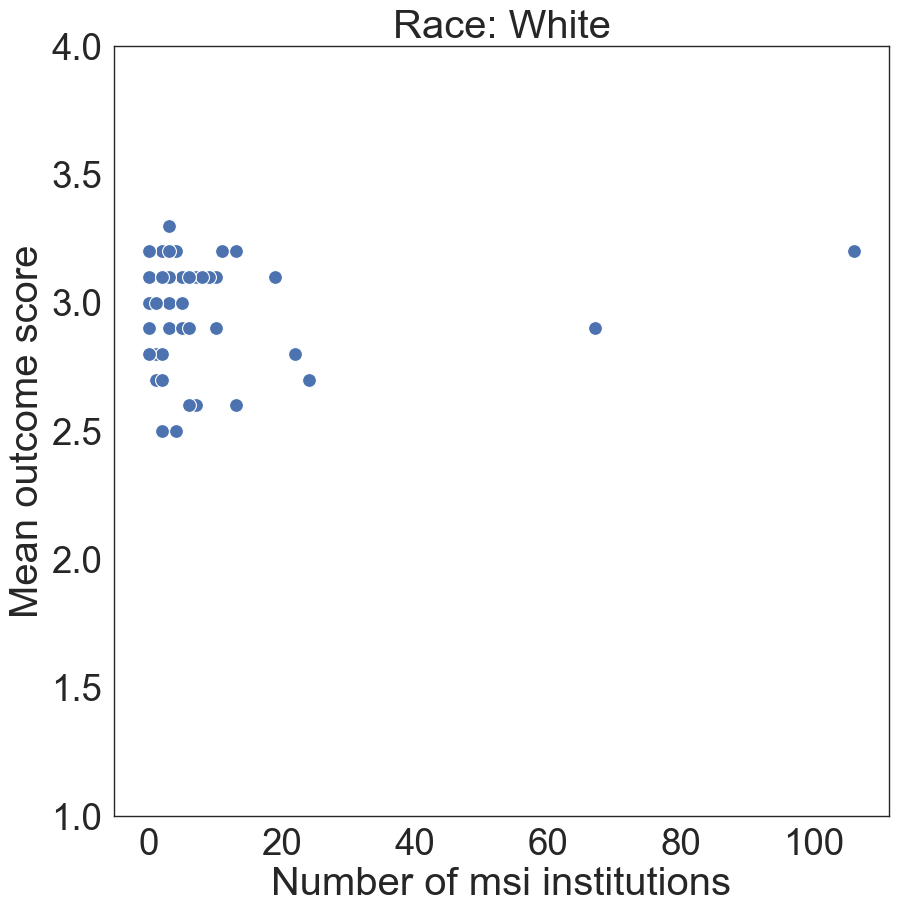

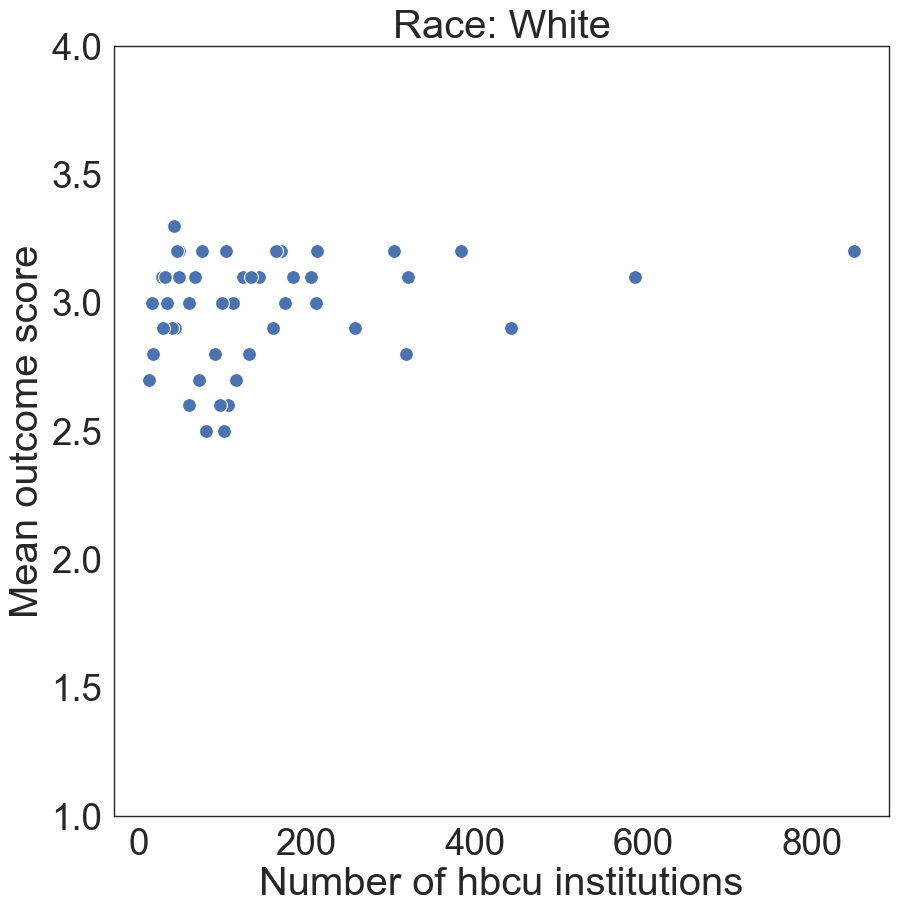

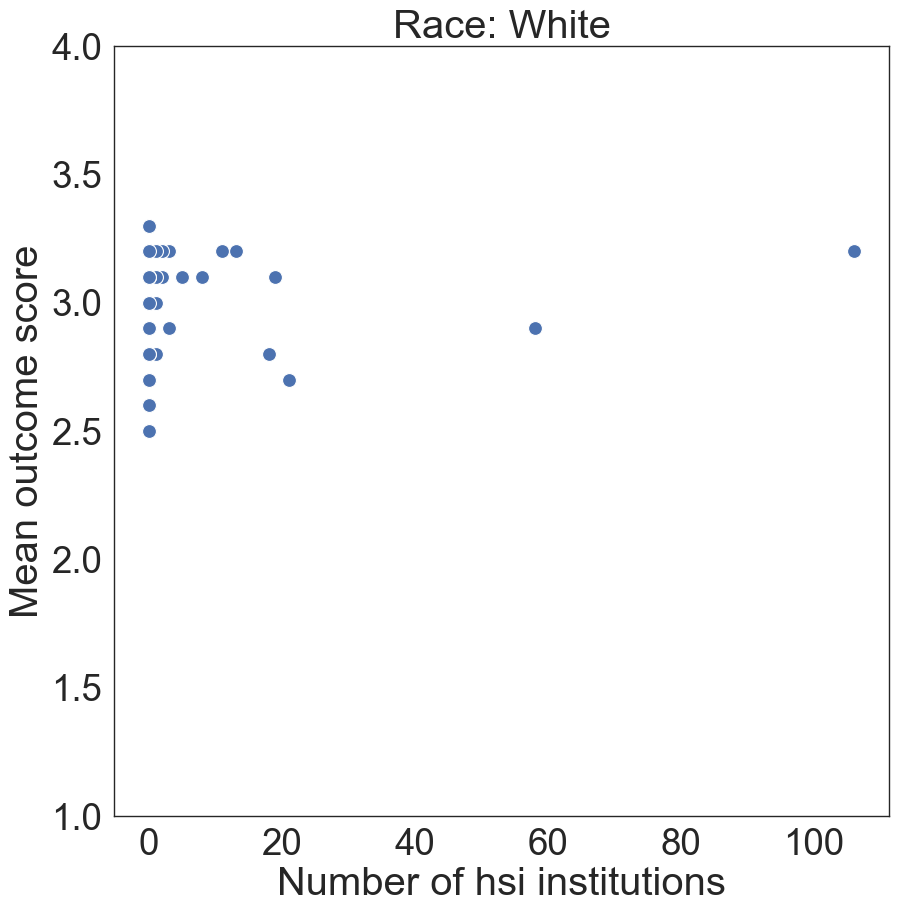

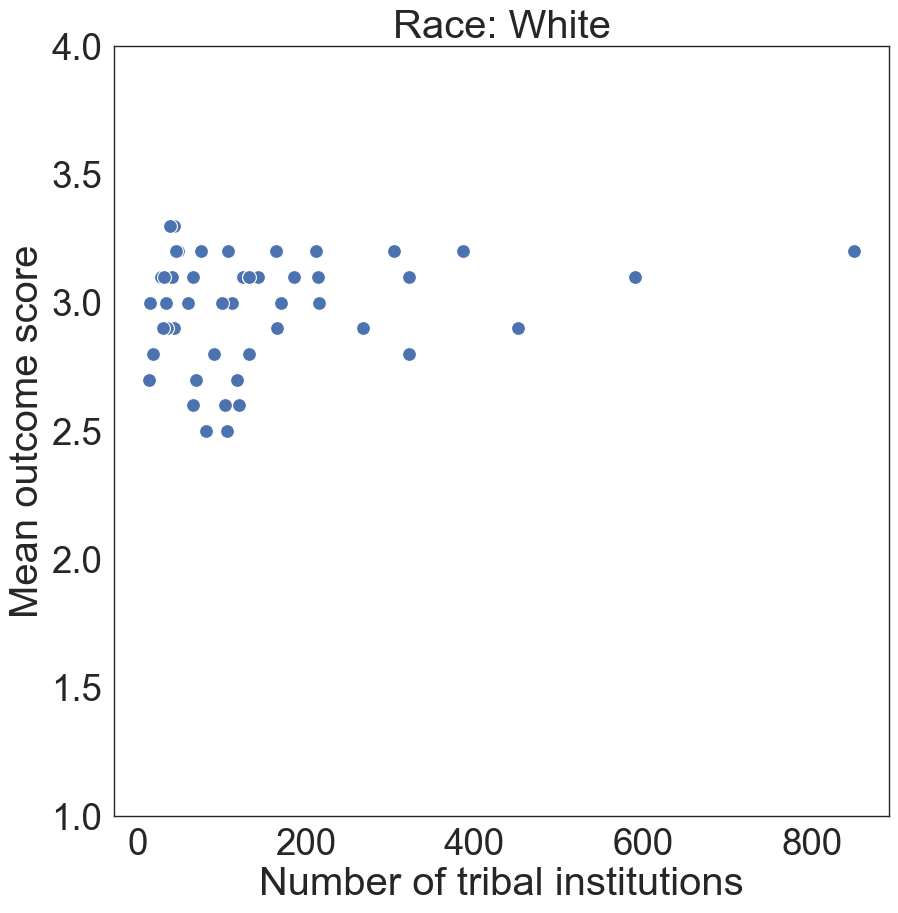

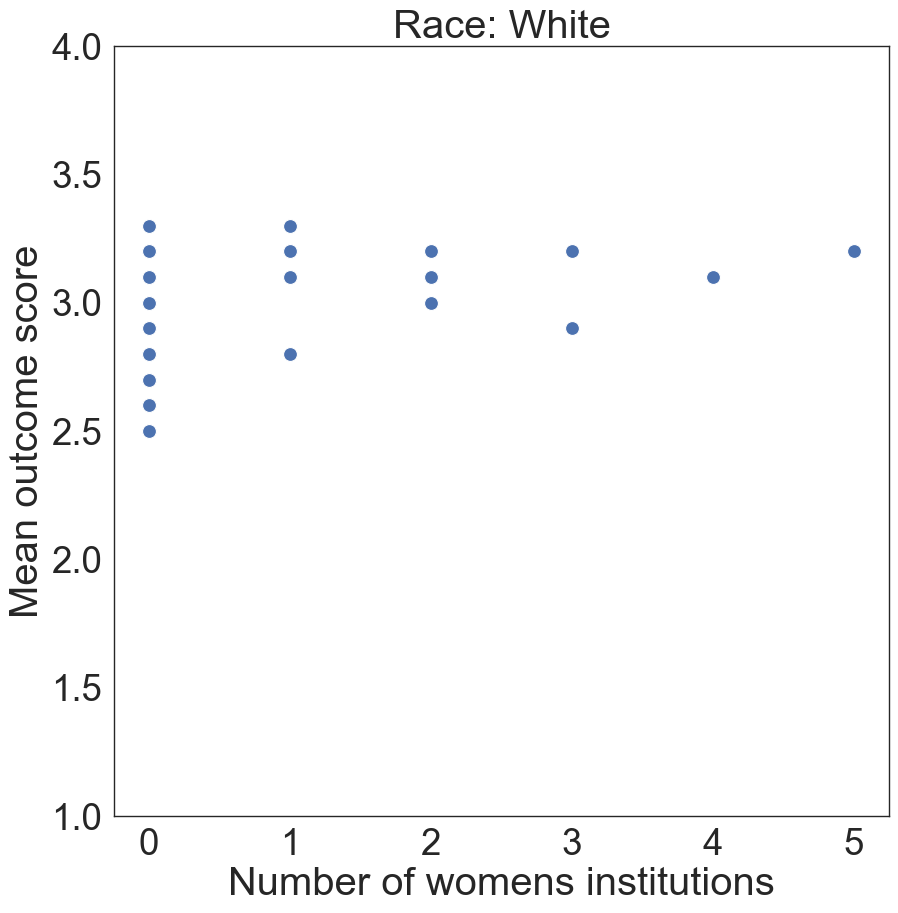

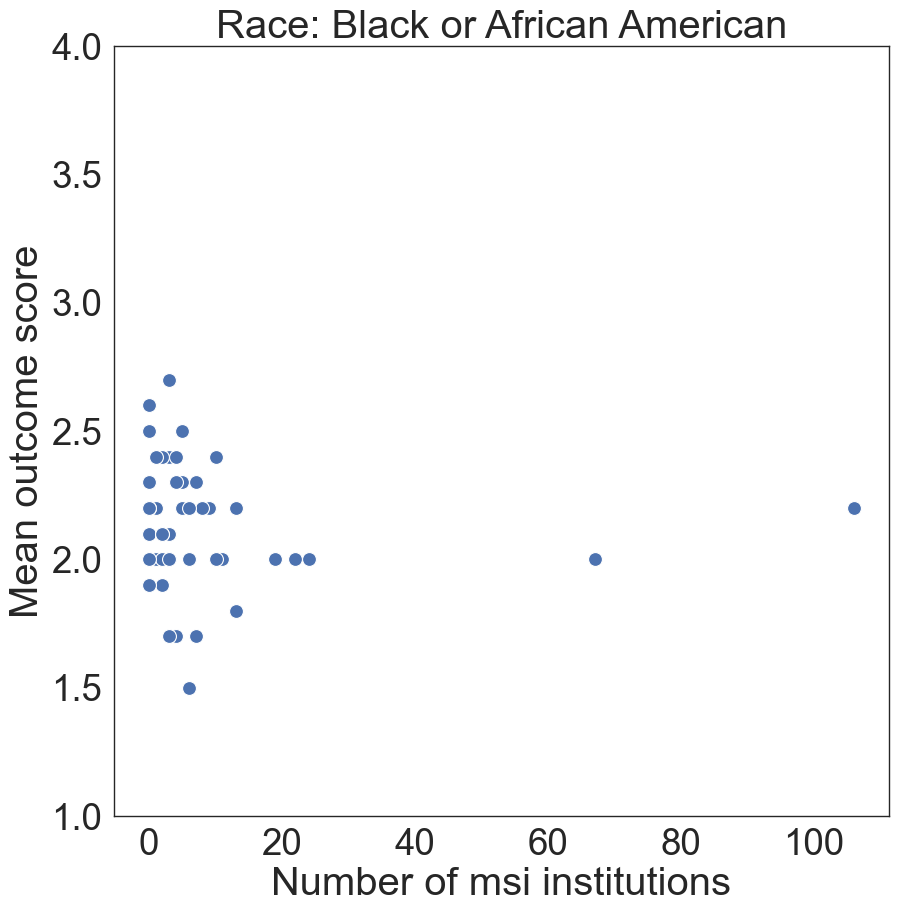

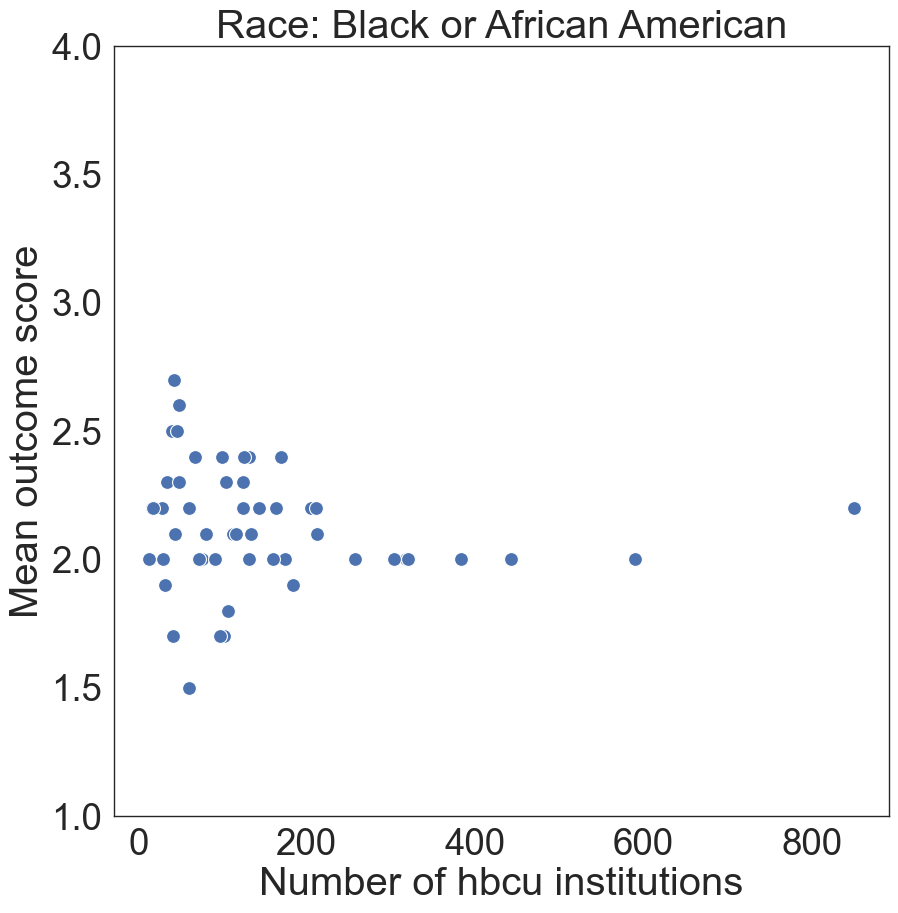

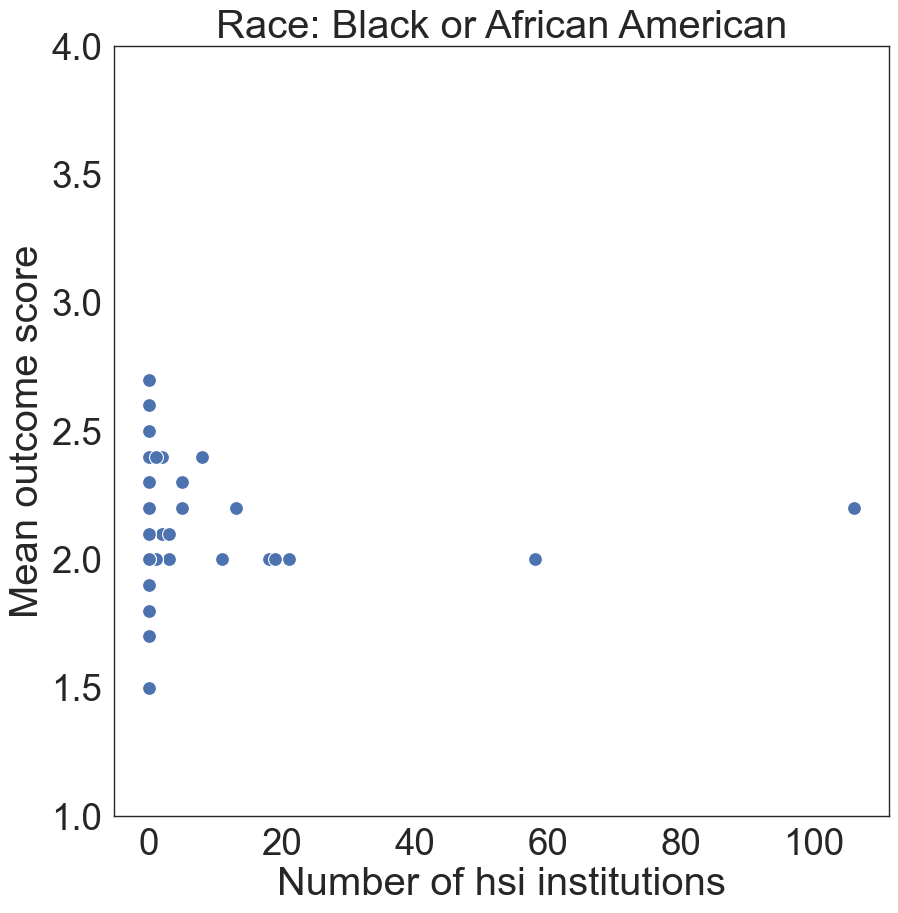

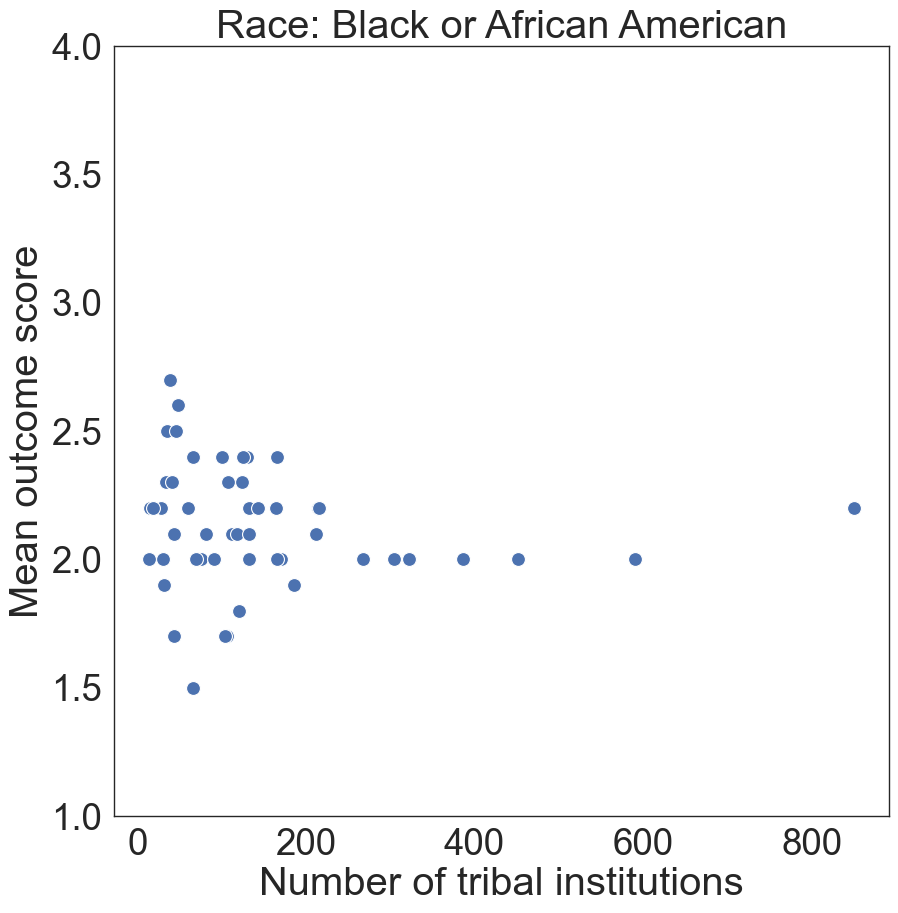

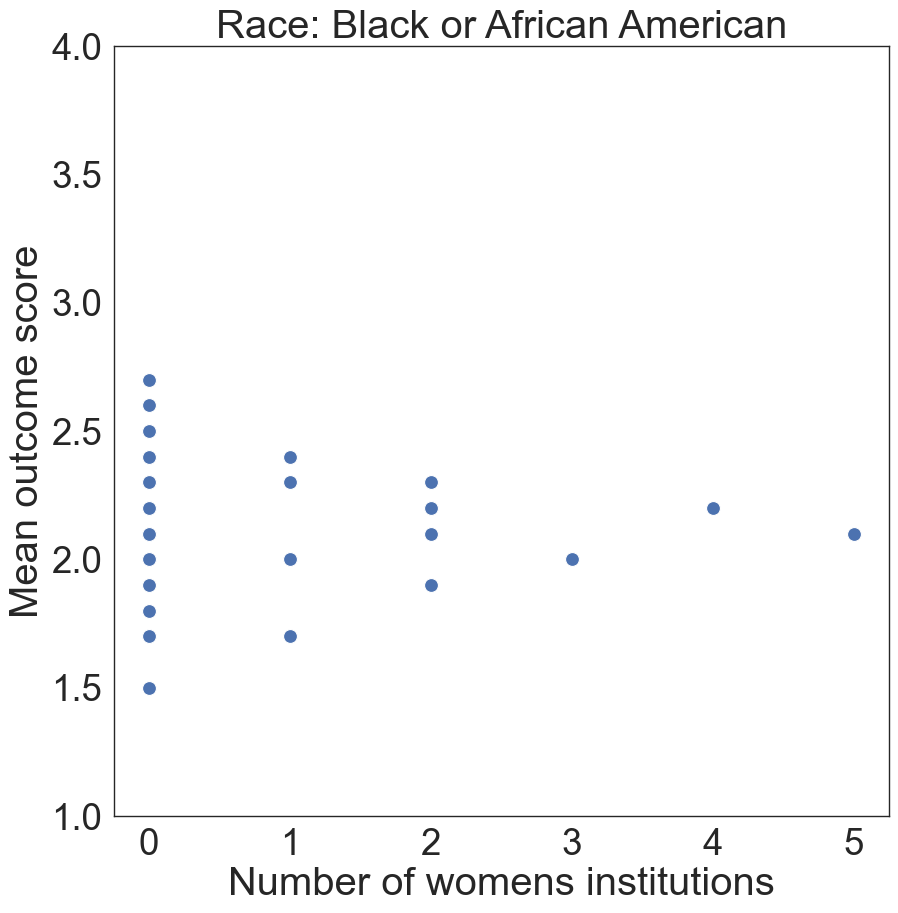

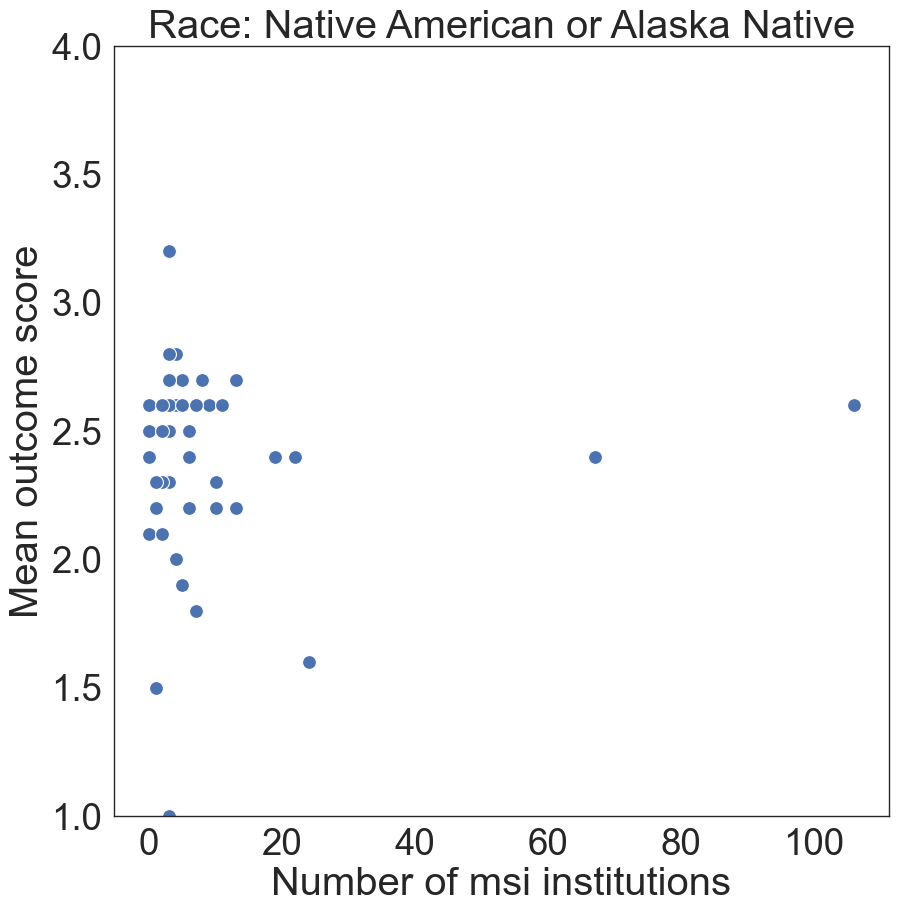

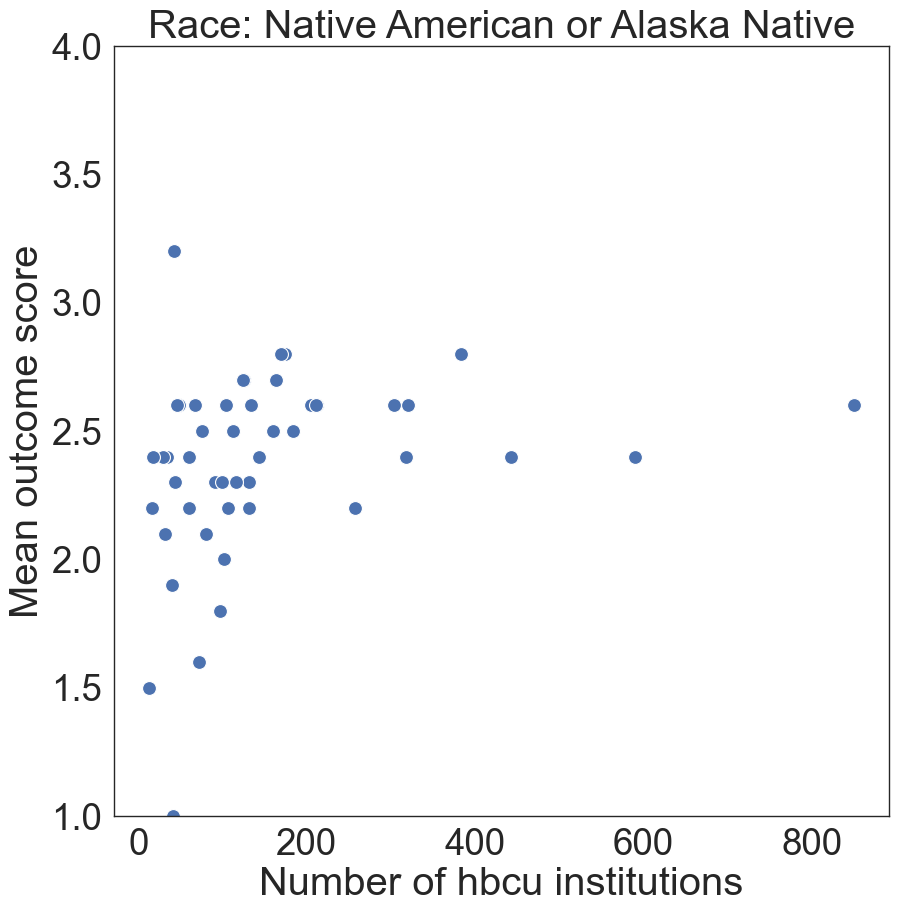

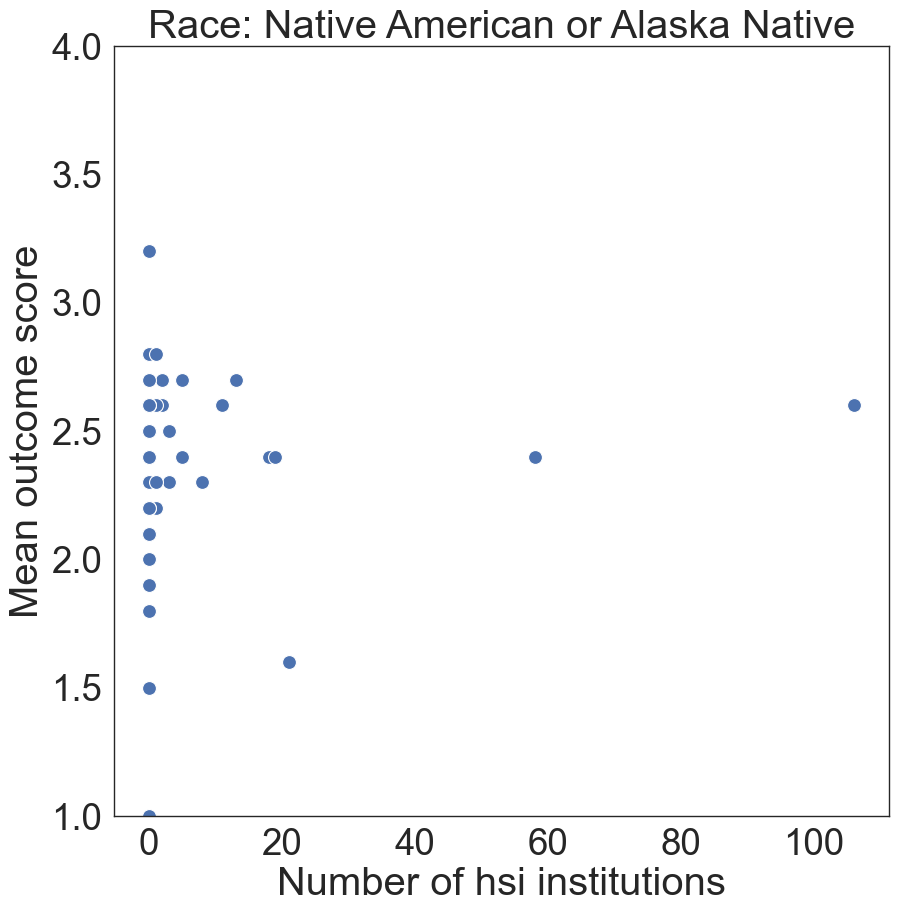

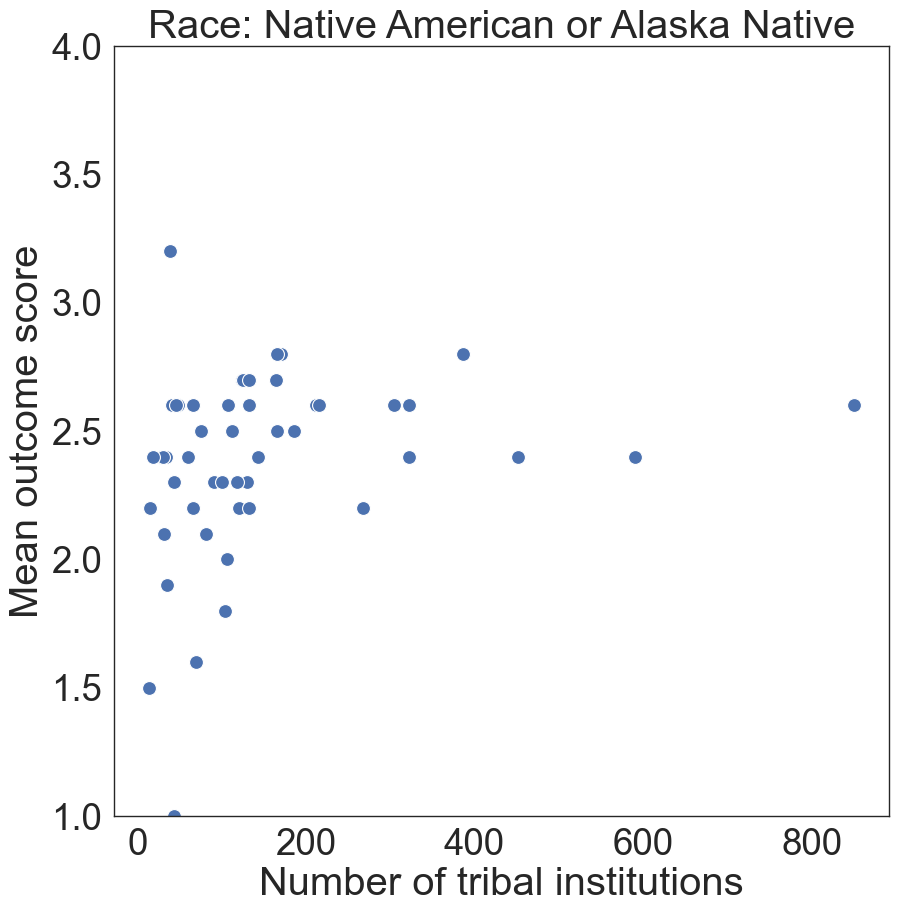

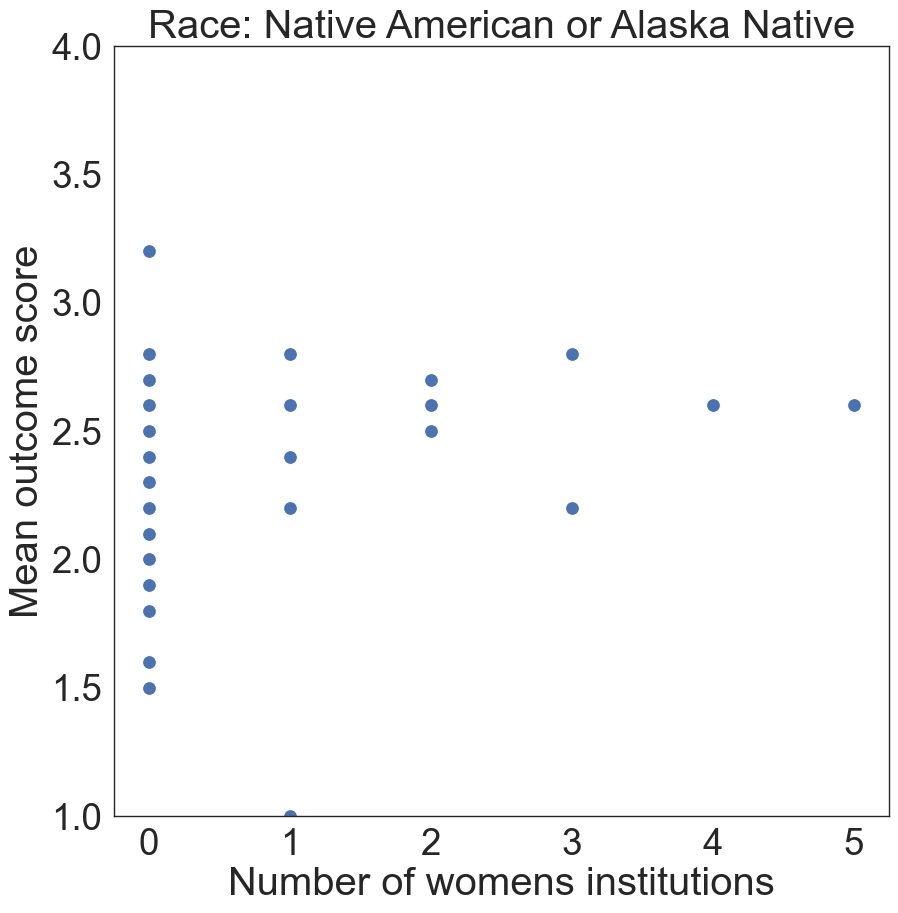

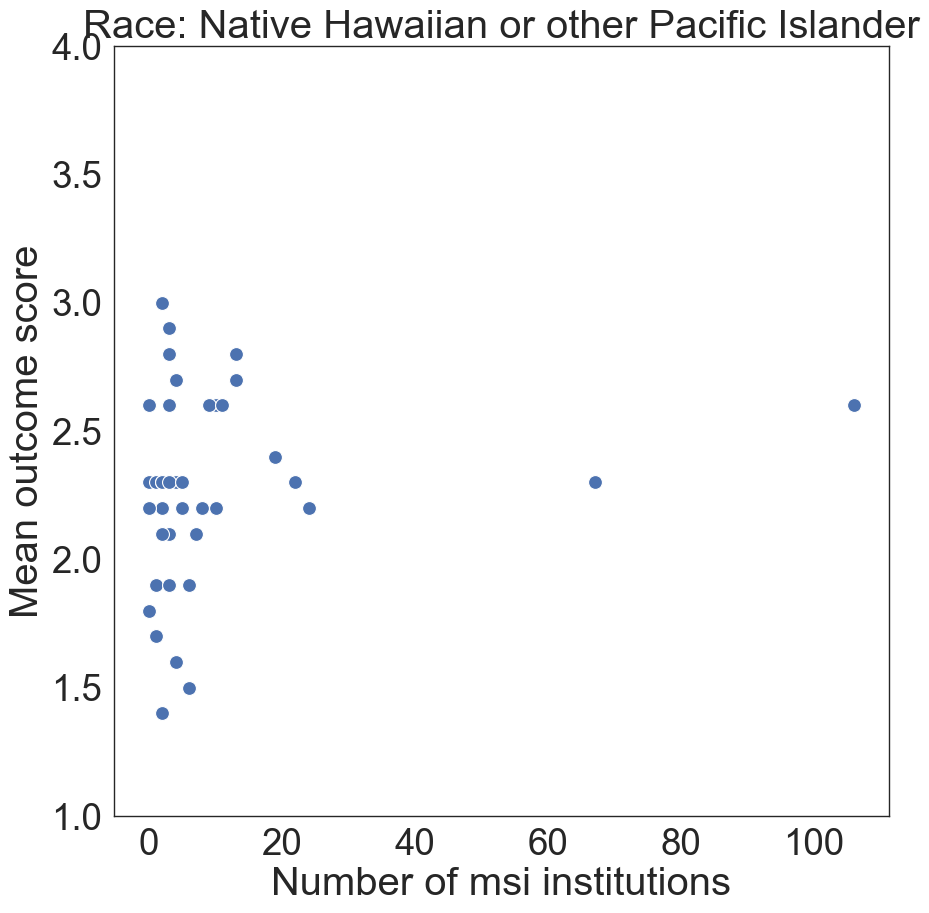

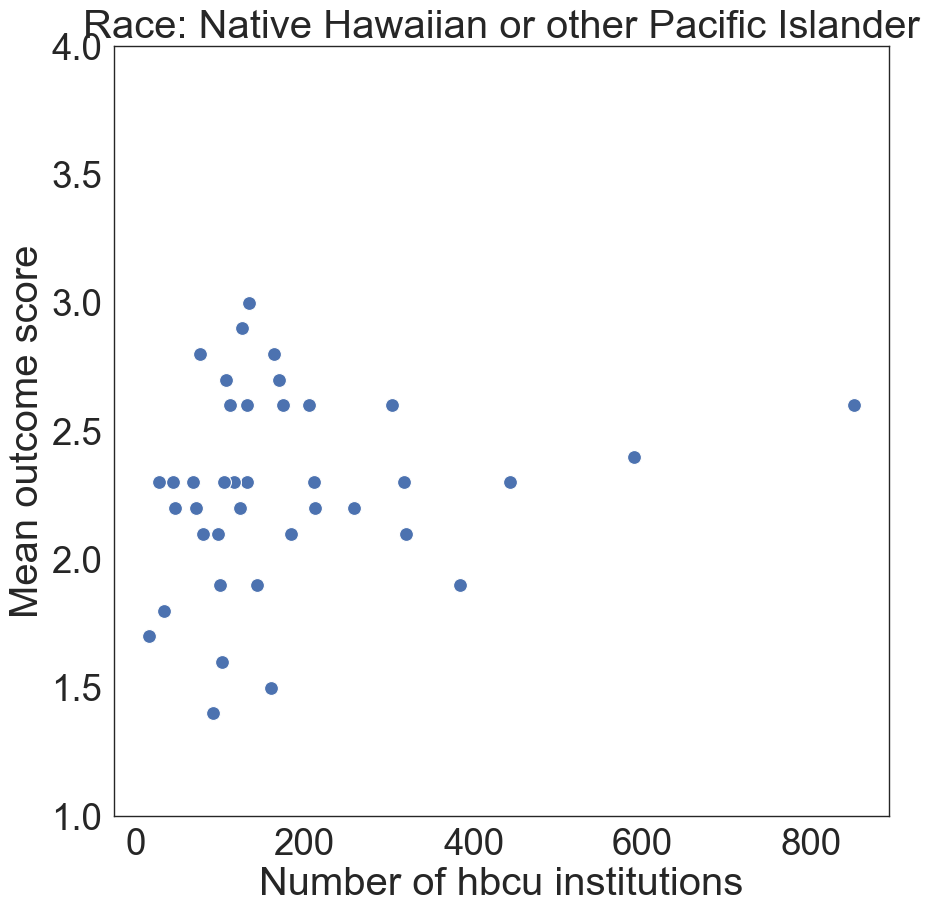

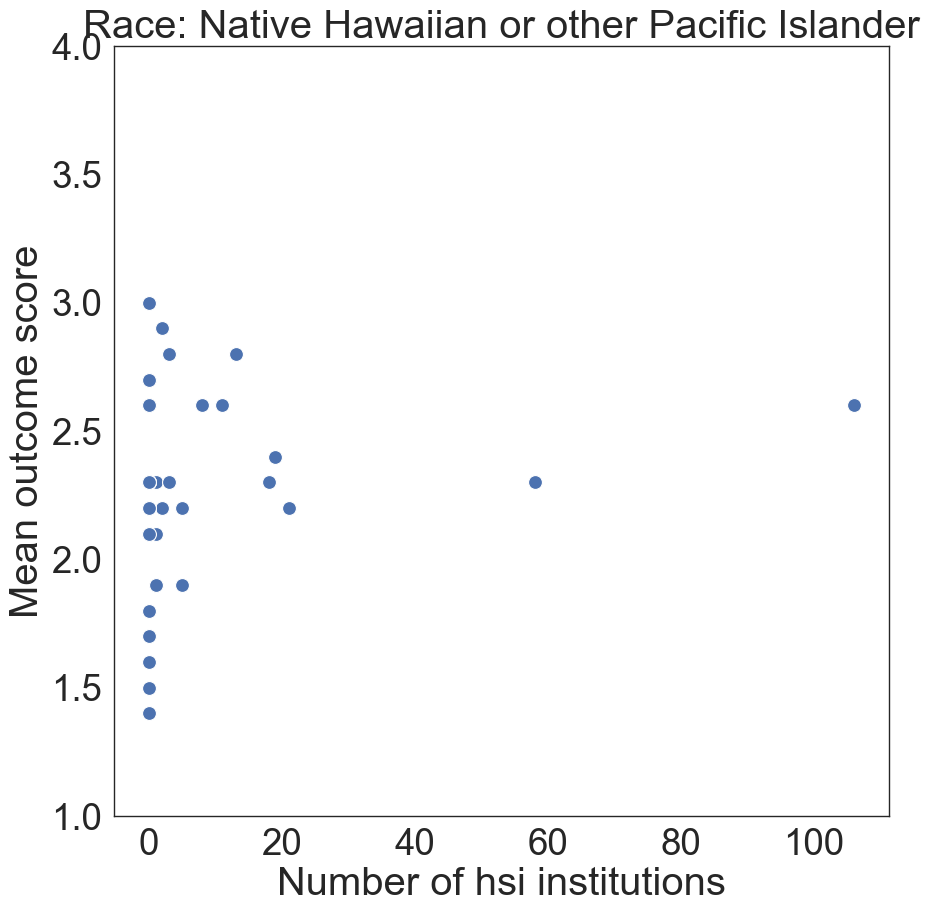

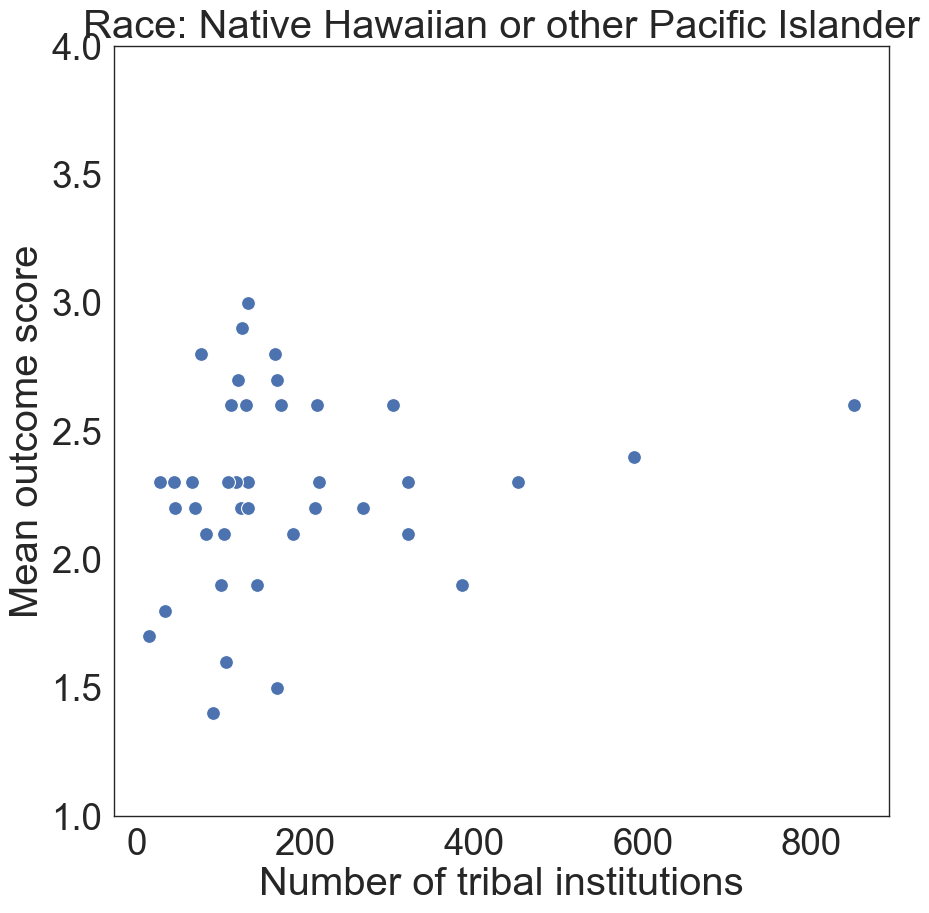

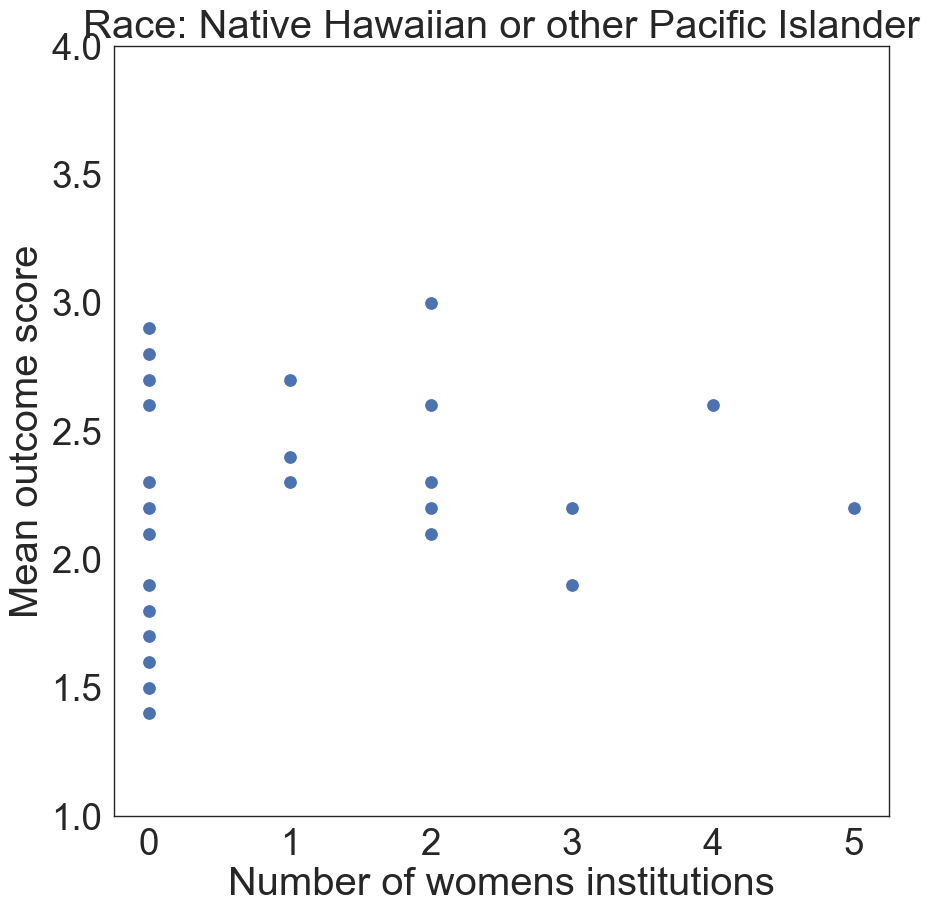

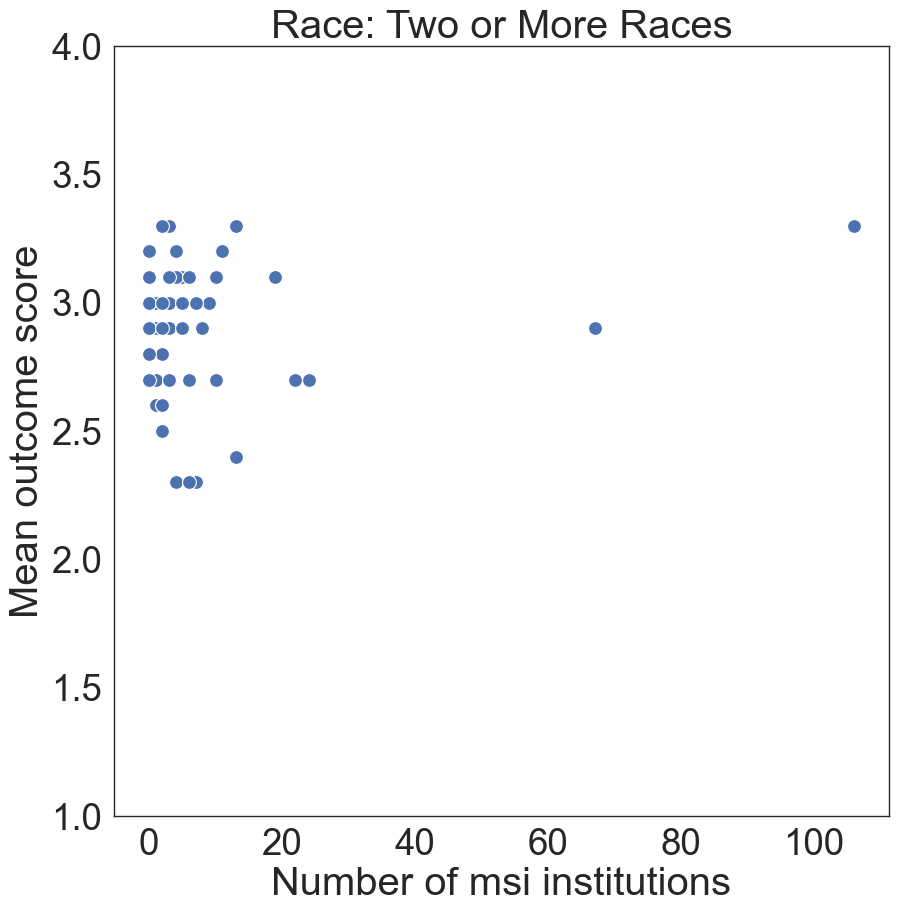

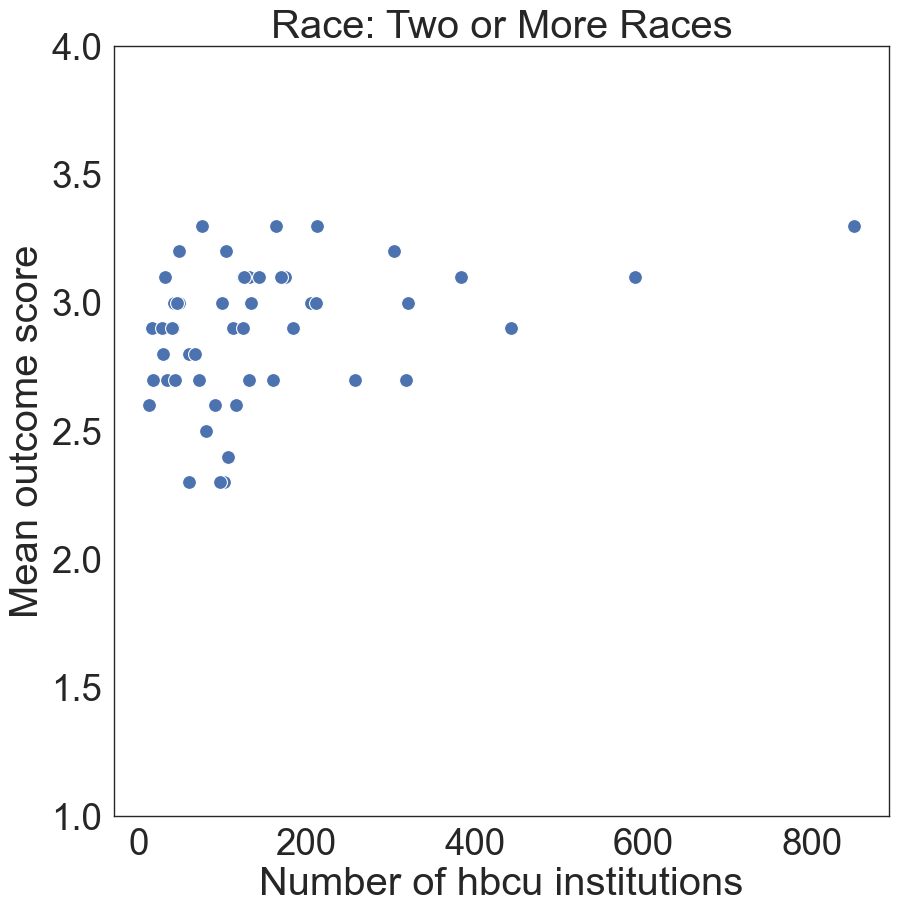

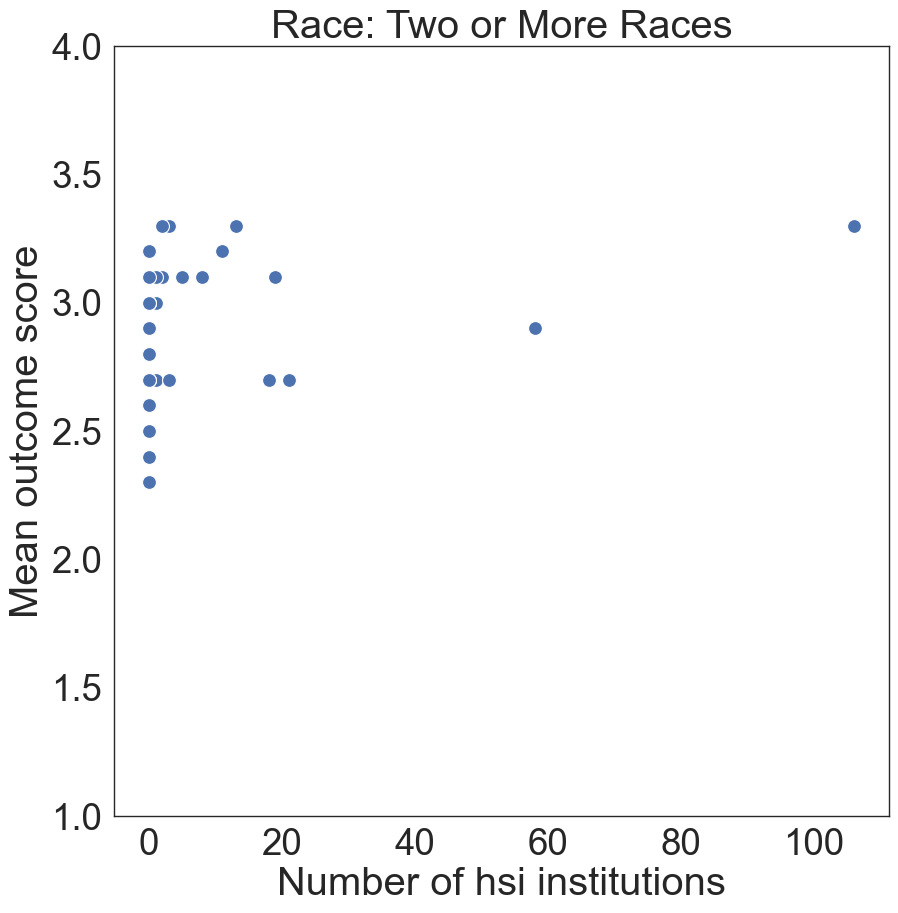

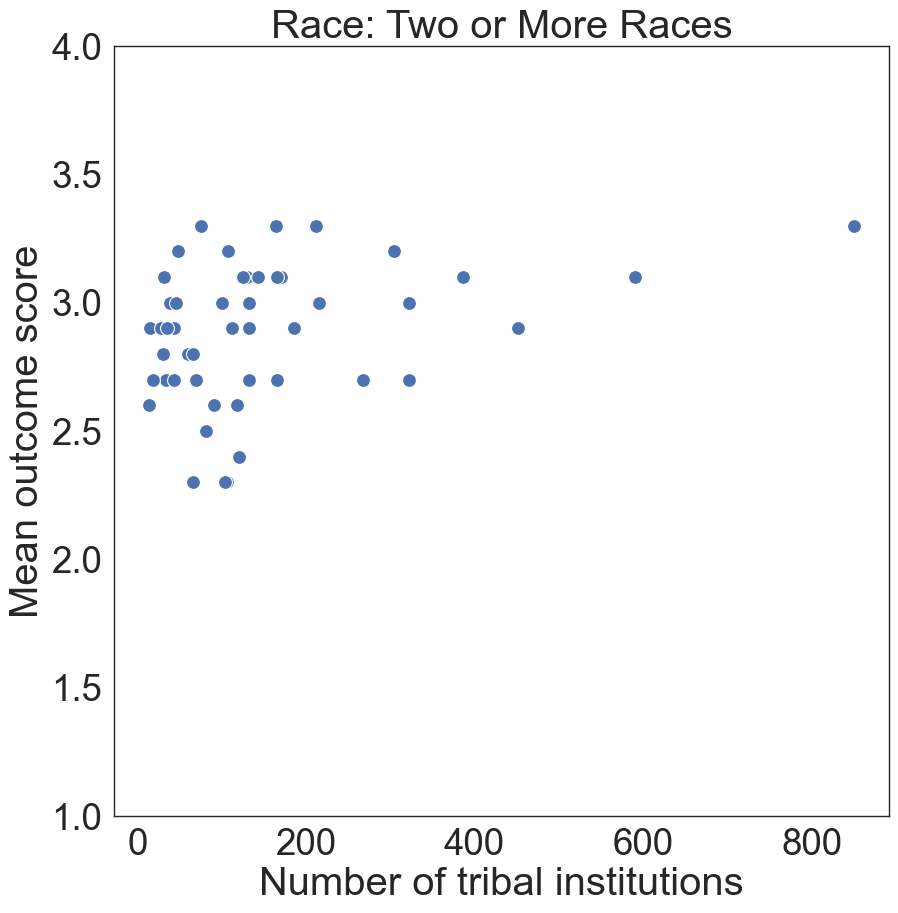

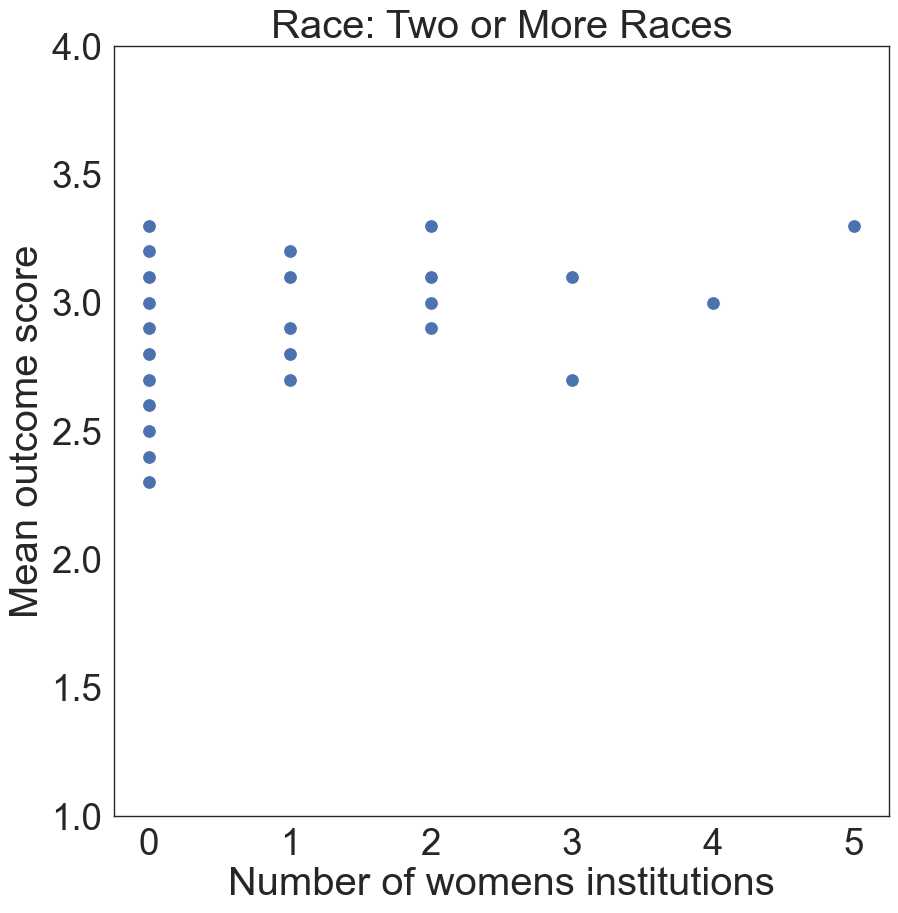

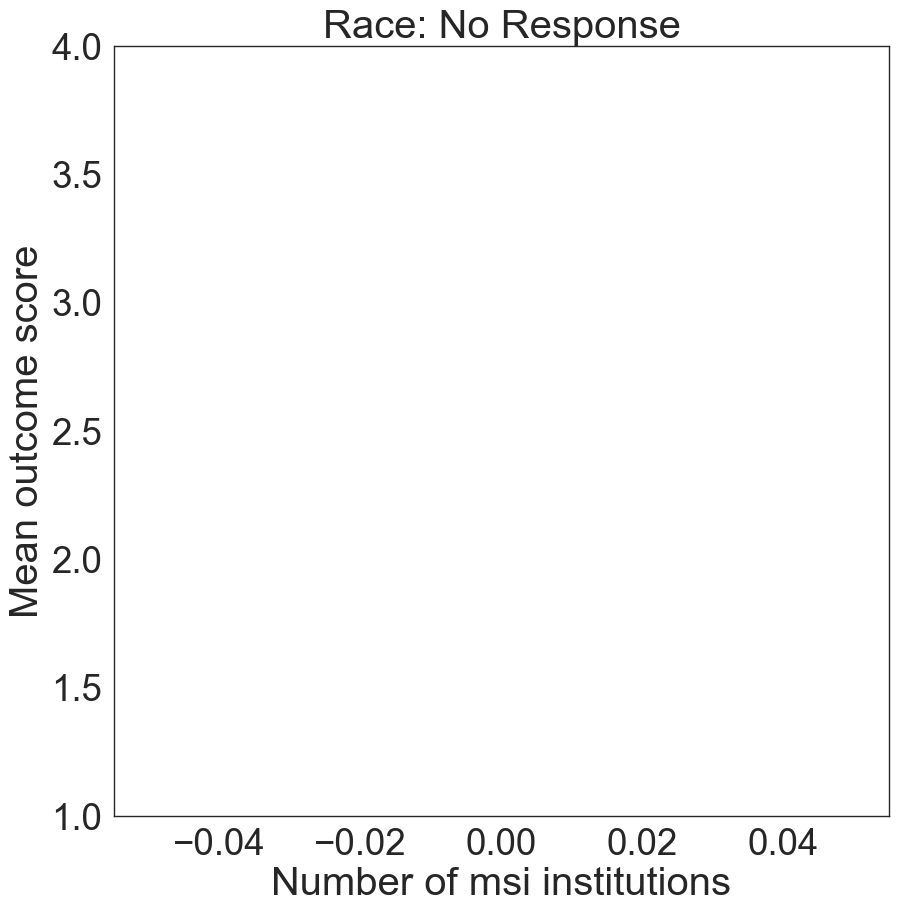

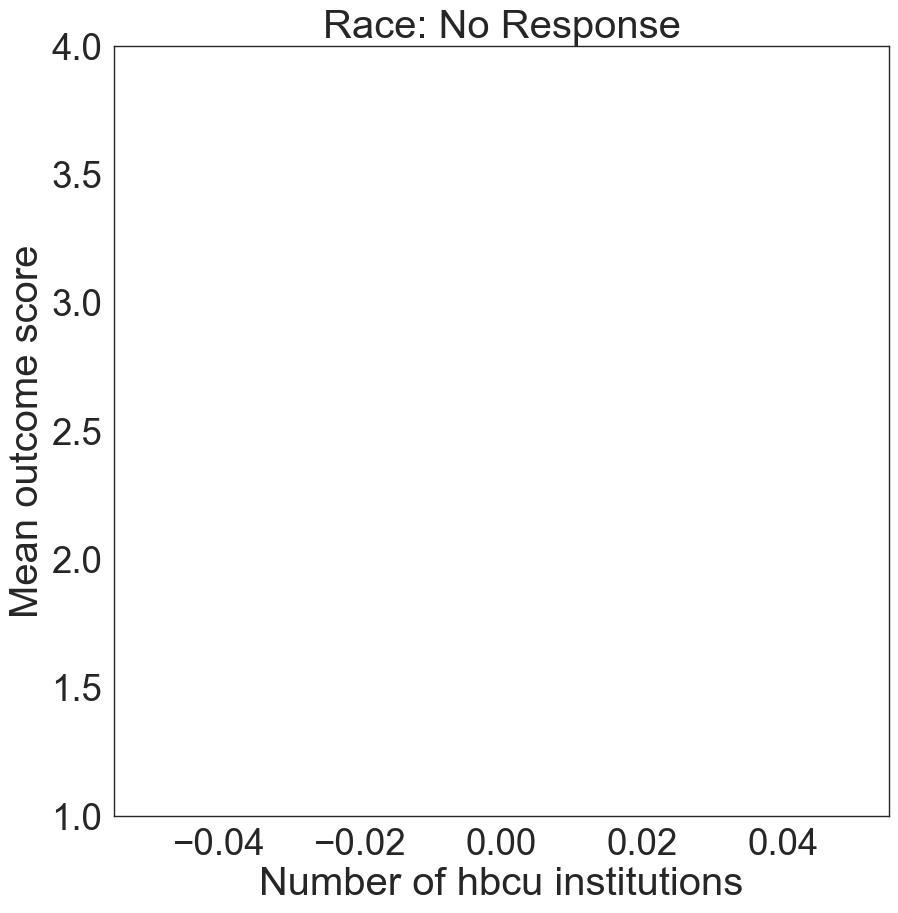

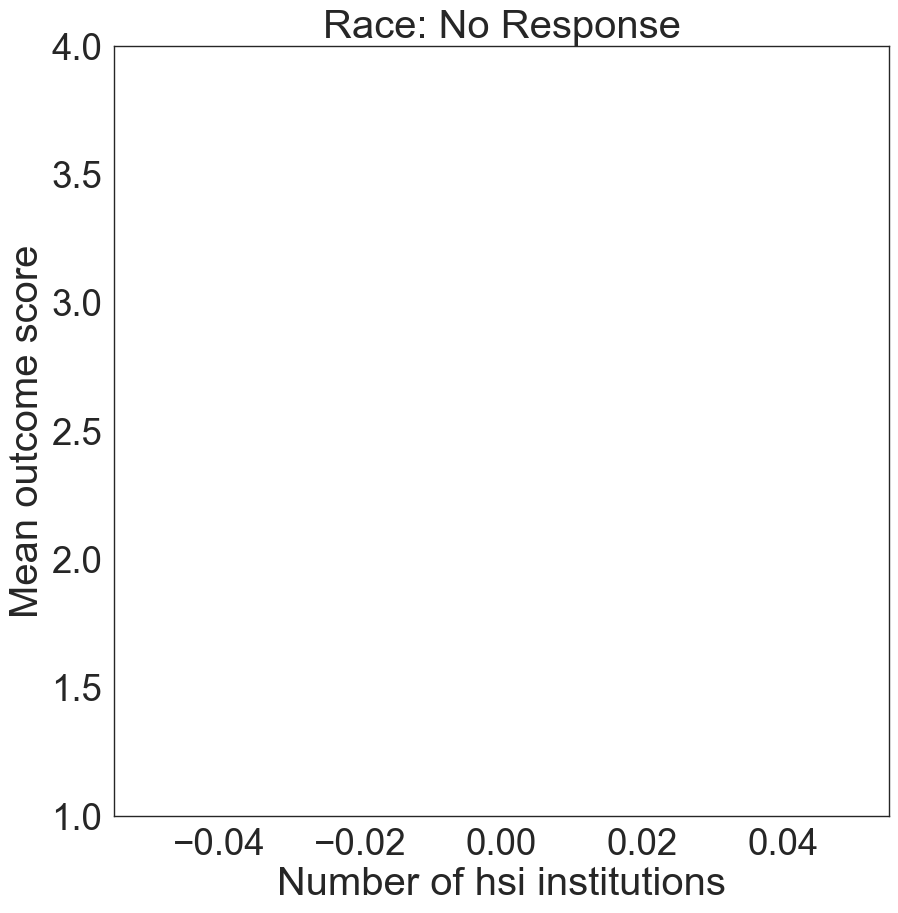

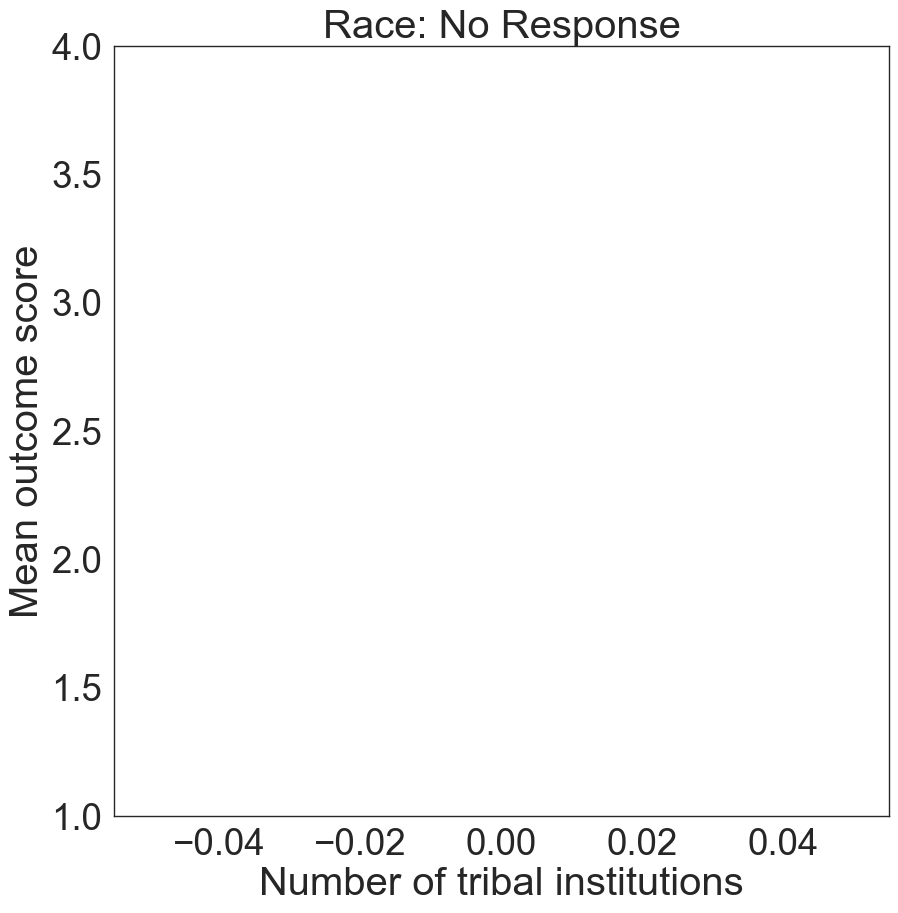

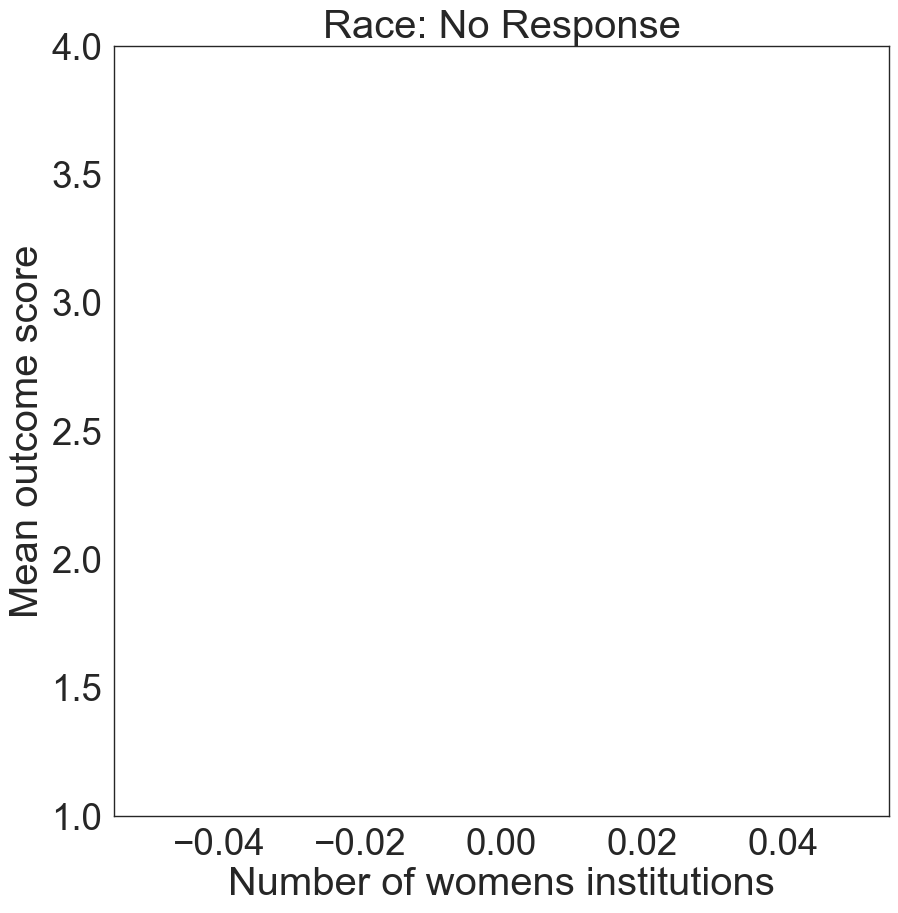

In [255]:
for race in minorities_ap:
    for category in carnegie_states_summed:
        if category=='stabbr': continue # skip state key
        sns.scatterplot(data=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['State']!='National'].loc[outcomes_ap_carnegie['Race']==race],x=category,y='Mean',s=100)
        plt.ylim(int(outcomes_ap_carnegie['Mean'].min()),round(outcomes_ap_carnegie['Mean'].max()))
        plt.xlabel(f'Number of {category} institutions')
        plt.ylabel('Mean outcome score')
        plt.title(f'Race: {race}')
        plt.show()
    # plt.legend(bbox_to_anchor=(1,1))

Some questions/observations: 

Why does MSI total not make sense?

Why does California have 850 HBCU and 850 tribal colleges?

Trends are not great.

In [279]:
outcomes_ap_carnegie

,State,Race,Score 5,Score 4,Score 3,Score 2,Score 1,Total,Mean,stabbr,msi,hbcu,hsi,tribal,womens
0,National,Overall,576744.0,812854.0,990625.0,860182.0,810450.0,4050855.0,2.9,NAT,0,0,0,0,0
1,National,Asian,175323.0,177303.0,167991.0,113783.0,76975.0,711375.0,3.4,NAT,0,0,0,0,0
2,National,Hispanic/Latino,70936.0,124761.0,194702.0,218490.0,299686.0,908575.0,2.4,NAT,0,0,0,0,0
3,National,White,267074.0,416702.0,498897.0,392871.0,254966.0,1830510.0,3.0,NAT,0,0,0,0,0
4,National,Black or African American,10809.0,25709.0,49923.0,66924.0,117110.0,270475.0,2.1,NAT,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Wyoming,Black or African American,NaN,NaN,NaN,NaN,NaN,14.0,2.2,WY,0,18,0,18,0
464,Wyoming,Native American or Alaska Native,NaN,NaN,NaN,NaN,NaN,69.0,2.4,WY,0,18,0,18,0
465,Wyoming,Native Hawaiian or other Pacific Islander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WY,0,18,0,18,0
466,Wyoming,Two or More Races,17.0,26.0,48.0,43.0,38.0,172.0,2.7,WY,0,18,0,18,0


In [292]:
correlations={}
for race in minorities_ap:
    corr_df=outcomes_ap_carnegie[['stabbr','Mean','msi','hbcu','hsi','tribal','womens']].loc[outcomes_ap_carnegie['Race']==race]
    corr_df.index=corr_df['stabbr']
    correlations[race]=corr_df[['Mean','msi','hbcu','hsi','tribal','womens']].corr()['Mean']